# Data Loading

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [3]:
sig = True
zscore = False
cluster = False

In [3]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [5]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

### Relative to Response Onset

Load in S14 Data

In [6]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


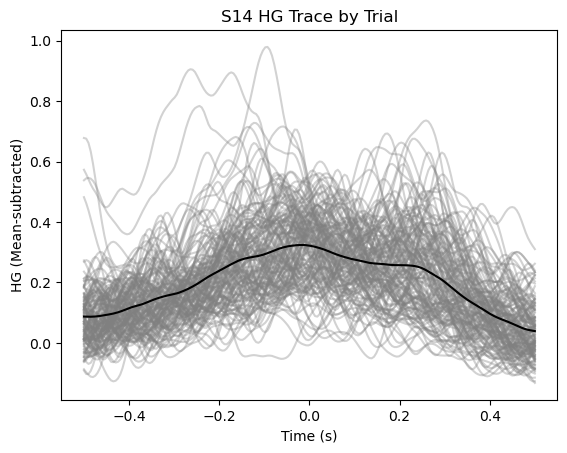

In [7]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(S14_hg_trace, axis=2).T, 'grey', alpha=0.35)
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(np.mean(S14_hg_trace, axis=2), axis=0), 'black')
plt.xlabel('Time (s)')
plt.ylabel('HG (Mean-subtracted)')
plt.title('S14 HG Trace by Trial')
plt.show()

Load in S26 Data

In [8]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


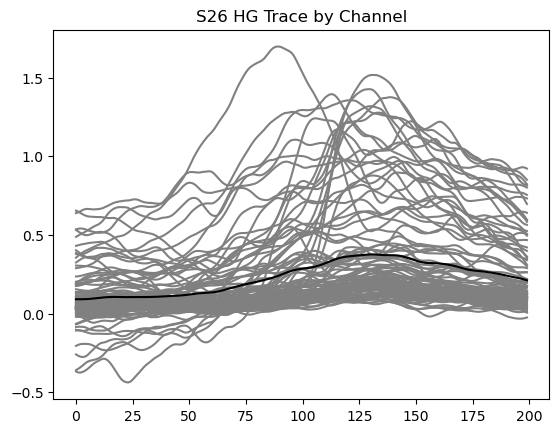

In [9]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [10]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


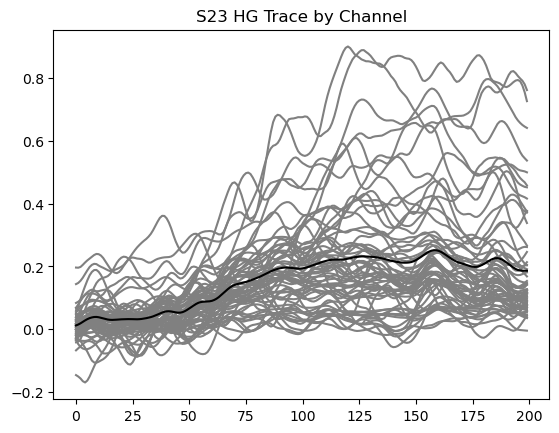

In [11]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [12]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


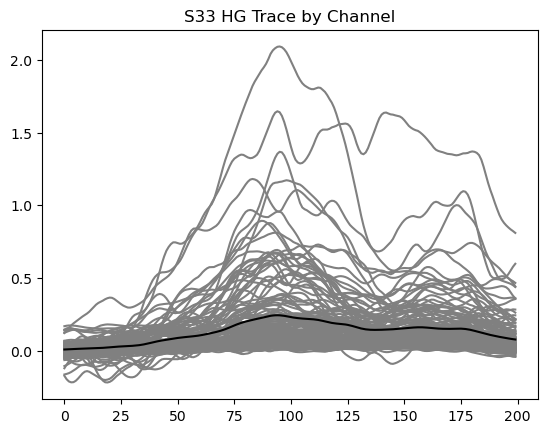

In [13]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

### Relative to Different Phoneme Onsets

In [14]:
from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

S14 Data

In [15]:
S14_hg_data = load_subject_high_gamma_phoneme('S14', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(144, 200, 111) (144, 200, 111) (144, 200, 111)
(144, 8, 16, 200) (144, 8, 16, 200) (144, 8, 16, 200)
(144,) (144,) (144,) (144, 3)


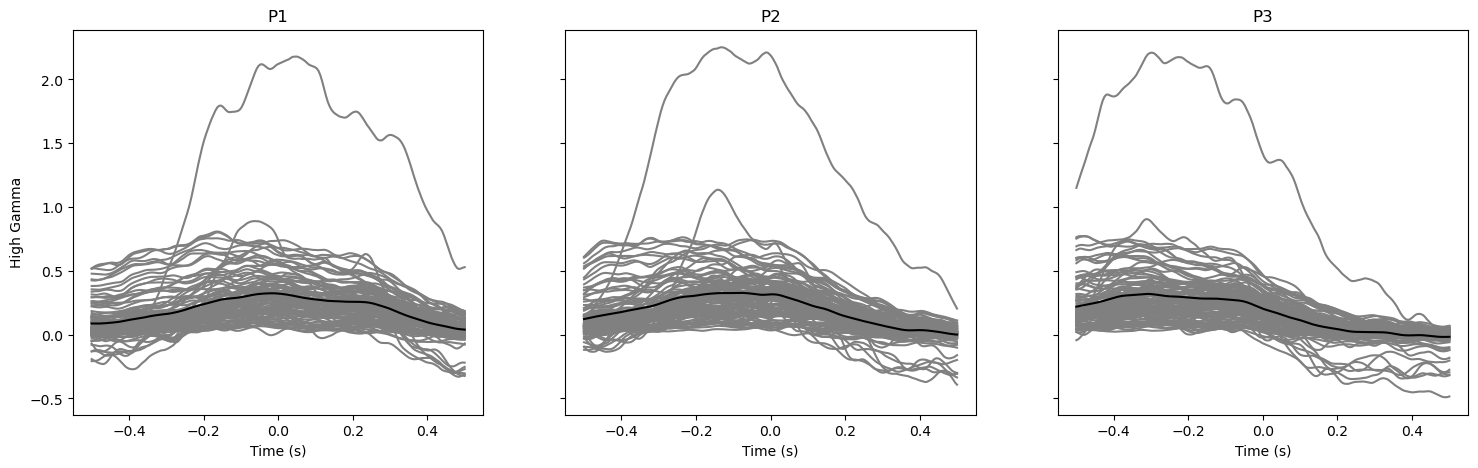

In [16]:
print(S14_hg_data['X1'].shape, S14_hg_data['X2'].shape, S14_hg_data['X3'].shape)
print(S14_hg_data['X1_map'].shape, S14_hg_data['X2_map'].shape, S14_hg_data['X3_map'].shape)
print(S14_hg_data['y1'].shape, S14_hg_data['y2'].shape, S14_hg_data['y3'].shape, S14_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S14_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S14_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S14_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S14_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S14_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S14_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S14_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S26 data

In [17]:
S26_hg_data = load_subject_high_gamma_phoneme('S26', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(148, 200, 111) (148, 200, 111) (148, 200, 111)
(148, 8, 16, 200) (148, 8, 16, 200) (148, 8, 16, 200)
(148,) (148,) (148,) (148, 3)


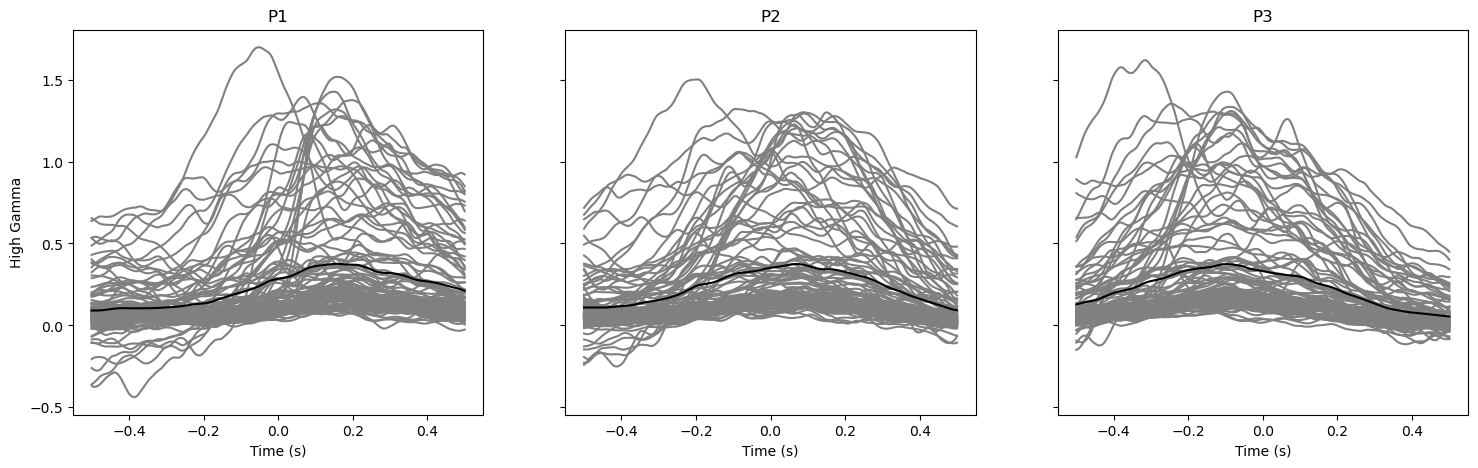

In [18]:
print(S26_hg_data['X1'].shape, S26_hg_data['X2'].shape, S26_hg_data['X3'].shape)
print(S26_hg_data['X1_map'].shape, S26_hg_data['X2_map'].shape, S26_hg_data['X3_map'].shape)
print(S26_hg_data['y1'].shape, S26_hg_data['y2'].shape, S26_hg_data['y3'].shape, S26_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S26_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S26_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S26_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S26_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S26_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S26_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S26_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()


S23 Data

In [19]:
S23_hg_data = load_subject_high_gamma_phoneme('S23', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(151, 200, 63) (151, 200, 63) (151, 200, 63)
(151, 8, 16, 200) (151, 8, 16, 200) (151, 8, 16, 200)
(151,) (151,) (151,) (151, 3)


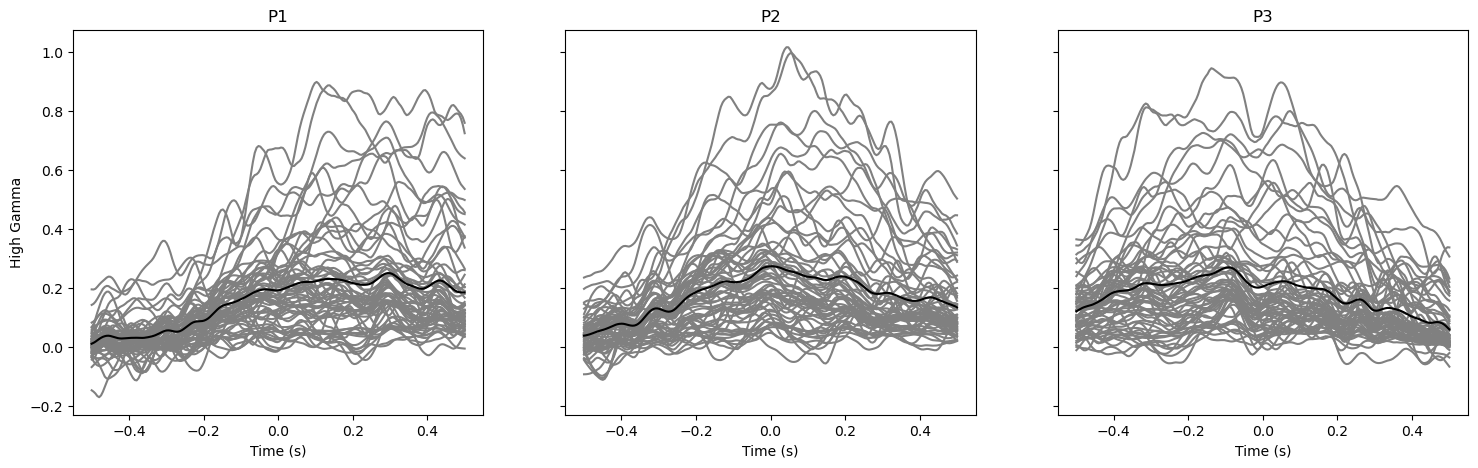

In [20]:
print(S23_hg_data['X1'].shape, S23_hg_data['X2'].shape, S23_hg_data['X3'].shape)
print(S23_hg_data['X1_map'].shape, S23_hg_data['X2_map'].shape, S23_hg_data['X3_map'].shape)
print(S23_hg_data['y1'].shape, S23_hg_data['y2'].shape, S23_hg_data['y3'].shape, S23_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S23_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S23_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S23_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S23_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S23_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S23_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S23_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S33 Data

In [21]:
S33_hg_data = load_subject_high_gamma_phoneme('S33', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(46, 200, 149) (46, 200, 149) (46, 200, 149)
(46, 12, 24, 200) (46, 12, 24, 200) (46, 12, 24, 200)
(46,) (46,) (46,) (46, 3)


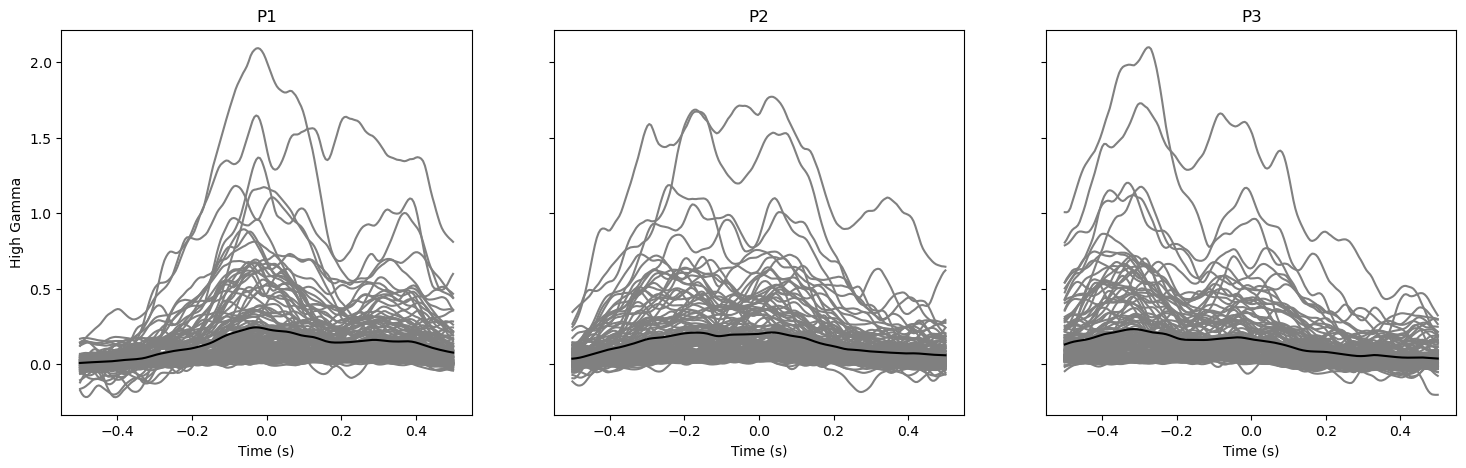

In [22]:
print(S33_hg_data['X1'].shape, S33_hg_data['X2'].shape, S33_hg_data['X3'].shape)
print(S33_hg_data['X1_map'].shape, S33_hg_data['X2_map'].shape, S33_hg_data['X3_map'].shape)
print(S33_hg_data['y1'].shape, S33_hg_data['y2'].shape, S33_hg_data['y3'].shape, S33_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S33_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S33_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S33_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S33_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S33_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S33_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S33_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

In [23]:
S14_artic_labels = phon_to_artic_seq(S14_phon_labels, phon_to_artic_dict)
S26_artic_labels = phon_to_artic_seq(S26_phon_labels, phon_to_artic_dict)
S23_artic_labels = phon_to_artic_seq(S23_phon_labels, phon_to_artic_dict)
S33_artic_labels = phon_to_artic_seq(S33_phon_labels, phon_to_artic_dict)

### Collapse Across Positions

In [24]:
S14_hg_collapsed = np.concatenate((S14_hg_data['X1'], S14_hg_data['X2'], S14_hg_data['X3']), axis=0)
S14_phon_labels_collapsed = np.concatenate((S14_hg_data['y1'], S14_hg_data['y2'], S14_hg_data['y3']), axis=0)

S26_hg_collapsed = np.concatenate((S26_hg_data['X1'], S26_hg_data['X2'], S26_hg_data['X3']), axis=0)
S26_phon_labels_collapsed = np.concatenate((S26_hg_data['y1'], S26_hg_data['y2'], S26_hg_data['y3']), axis=0)

S23_hg_collapsed = np.concatenate((S23_hg_data['X1'], S23_hg_data['X2'], S23_hg_data['X3']), axis=0)
S23_phon_labels_collapsed = np.concatenate((S23_hg_data['y1'], S23_hg_data['y2'], S23_hg_data['y3']), axis=0)

S33_hg_collapsed = np.concatenate((S33_hg_data['X1'], S33_hg_data['X2'], S33_hg_data['X3']), axis=0)
S33_phon_labels_collapsed = np.concatenate((S33_hg_data['y1'], S33_hg_data['y2'], S33_hg_data['y3']), axis=0)

In [25]:
S14_artic_labels_collapsed = phon_to_artic_seq(S14_phon_labels_collapsed, phon_to_artic_dict)
S26_artic_labels_collapsed = phon_to_artic_seq(S26_phon_labels_collapsed, phon_to_artic_dict)
S23_artic_labels_collapsed = phon_to_artic_seq(S23_phon_labels_collapsed, phon_to_artic_dict)
S33_artic_labels_collapsed = phon_to_artic_seq(S33_phon_labels_collapsed, phon_to_artic_dict)

# Joint PCA Decomp Decoding

### Data Preparation

#### Saving pt data as pkl dict to load from

In [30]:
# S14_hg_data['y_full_artic'] = S14_artic_labels
# S26_hg_data['y_full_artic'] = S26_artic_labels
# S23_hg_data['y_full_artic'] = S23_artic_labels
# S33_hg_data['y_full_artic'] = S33_artic_labels

# S14_hg_data['X_collapsed'] = S14_hg_collapsed
# S26_hg_data['X_collapsed'] = S26_hg_collapsed
# S23_hg_data['X_collapsed'] = S23_hg_collapsed
# S33_hg_data['X_collapsed'] = S33_hg_collapsed

# S14_hg_data['y_phon_collapsed'] = S14_phon_labels_collapsed
# S26_hg_data['y_phon_collapsed'] = S26_phon_labels_collapsed
# S23_hg_data['y_phon_collapsed'] = S23_phon_labels_collapsed
# S33_hg_data['y_phon_collapsed'] = S33_phon_labels_collapsed

# S14_hg_data['y_artic_collapsed'] = S14_artic_labels_collapsed
# S26_hg_data['y_artic_collapsed'] = S26_artic_labels_collapsed
# S23_hg_data['y_artic_collapsed'] = S23_artic_labels_collapsed
# S33_hg_data['y_artic_collapsed'] = S33_artic_labels_collapsed


In [31]:
# pt_dict = {}

# # merge pretrain information with pt data
# pt_dict['S14'] = S14_hg_data | {'pre_pts': ['S26', 'S33', 'S23']}
# pt_dict['S26'] = S26_hg_data | {'pre_pts': ['S14', 'S33', 'S23']}
# pt_dict['S23'] = S23_hg_data | {'pre_pts': ['S14', 'S26', 'S33']}
# pt_dict['S33'] = S33_hg_data | {'pre_pts': ['S14', 'S26', 'S23']}

In [32]:
# from utils import save_pkl

# save_pkl(pt_dict, '../data/pt_decoding_data.pkl')

### Main decoding cell

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from tqdm.notebook import tqdm

from alignment_methods import JointPCADecomp, CCAAlign
import utils

# patient and target params
pt = 'S14'
p_ind = -1

# experiment params
pool_pre = True
tar_in_train = True
cca_algn = False
joint_dim_red = True
tr_subsamp_r = 0.2

# constant params
n_iter = 50
n_folds = 5
n_comp = 30

# alignment label type
algn_type = 'artic_seq'
# algn_type = 'phon_seq'
algn_grouping = 'class'

# decoding label type
lab_type = 'phon'
# lab_type = 'artic'

# dimensionality reduction type
red_method = 'PCA'
dim_red = PCA

# decoding run filename
filename_suffix = 'joint_pca_pt_pooled'
filename = f'../acc_data/tr_subsamp_accs/{pt}_{"p" if lab_type == "phon" else "a"}{"All" if p_ind == -1 else p_ind}_{filename_suffix}.pkl'

# load data
pt_data = utils.load_pkl('../data/pt_decoding_data.pkl')
tar_data, pre_data = utils.decoding_data_from_dict(pt_data, pt, p_ind,
                                                   lab_type=lab_type,
                                                   algn_type=algn_type)
D_tar, lab_tar, lab_tar_full = tar_data
D1, lab1, lab1_full = pre_data[0]
D2, lab2, lab2_full = pre_data[1]
D3, lab3, lab3_full = pre_data[2]

iter_accs = []
wrong_trs_iter = []
y_true_iter, y_pred_iter = [], []
for _ in tqdm(range(n_iter)):
    y_true_all, y_pred_all = [], []
    wrong_trs_fold = []
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    for train_idx, test_idx in cv.split(D_tar, lab_tar):
        X1, X2, X3 = D1, D2, D3
        y1, y2, y3 = lab1, lab2, lab3
        y1_full, y2_full, y3_full = lab1_full, lab2_full, lab3_full
        
        # split target data into train and test
        X_tar_train, X_tar_test = D_tar[train_idx], D_tar[test_idx]
        y_tar_train, y_tar_test = lab_tar[train_idx], lab_tar[test_idx]
        y_tar_full_train, y_tar_full_test = (lab_tar_full[train_idx],
                                             lab_tar_full[test_idx])
        
        # subsample training data observations/trials
        if tr_subsamp_r < 1:
            # train test split to subsample training data with stratification
            # (could also use np.random.choice for non-stratified subsampling)
            X_tar_train, _, y_tar_train, _, y_tar_full_train, _ = (
                                    train_test_split(X_tar_train, y_tar_train,
                                                     y_tar_full_train,
                                                     train_size=tr_subsamp_r,
                                                     stratify=y_tar_train,
                                                     shuffle=True))

        # learn joint PCA decomposition from full label sequences
        if joint_dim_red:
            jointPCA = JointPCADecomp(n_components=n_comp)
            X1, X2, X3, X_tar_train = jointPCA.fit_transform([X1, X2, X3,
                                                            X_tar_train],
                                                            [y1_full, y2_full,
                                                            y3_full,
                                                            y_tar_full_train])
            # apply target transformation to test data
            X_tar_test = jointPCA.transform(X_tar_test, idx=3)
        else:  # apply separate dimensionality reduction to each dataset
            X1_p, X2_p, X3_p, X_tar_train_p, X_tar_test_p = (
                                    [X.reshape(-1, X.shape[-1]) for X in
                                     (X1, X2, X3, X_tar_train, X_tar_test)])
            X1_p, X2_p, X3_p = [dim_red(n_components=n_comp).fit_transform(X)
                                for X in [X1_p, X2_p, X3_p]]
            tar_dr = dim_red(n_components=n_comp)
            X_tar_train_p = tar_dr.fit_transform(X_tar_train_p)
            X_tar_test_p = tar_dr.transform(X_tar_test_p)
            X1, X2, X3, X_tar_train, X_tar_test = [X.reshape(Xs.shape[0], -1,
                                                             n_comp)
                                                   for (X, Xs) in
                                                   zip((X1_p, X2_p, X3_p,
                                                        X_tar_train_p,
                                                        X_tar_test_p),
                                                       (X1, X2, X3,
                                                        X_tar_train,
                                                        X_tar_test))]

        # align each pooled patient data to target data with CCA
        if cca_algn:
            cca1 = CCAAlign(type=algn_grouping)
            cca2 = CCAAlign(type=algn_grouping)
            cca3 = CCAAlign(type=algn_grouping)
            cca1.fit(X_tar_train, X1, y_tar_full_train, y1_full)
            cca2.fit(X_tar_train, X2, y_tar_full_train, y2_full)
            cca3.fit(X_tar_train, X3, y_tar_full_train, y3_full)
            X1 = cca1.transform(X1)
            X2 = cca2.transform(X2)
            X3 = cca3.transform(X3)

        # reshape to trials x features
        X_tar_train = X_tar_train.reshape(X_tar_train.shape[0], -1)
        X_tar_test = X_tar_test.reshape(X_tar_test.shape[0], -1)
        X1 = X1.reshape(X1.shape[0], -1)
        X2 = X2.reshape(X2.shape[0], -1)
        X3 = X3.reshape(X3.shape[0], -1)

        if not pool_pre:
            X_train, y_train = X_tar_train, y_tar_train
        else:
            if not tar_in_train:
                X_train = np.concatenate((X1, X2, X3), axis=0)
                y_train = np.concatenate((y1, y2, y3), axis=0)
            else:
                X_train = np.concatenate((X_tar_train, X1, X2, X3), axis=0)
                y_train = np.concatenate((y_tar_train, y1, y2, y3), axis=0)
                # X_train = np.concatenate((X_tar_train, X1, X2), axis=0)  # no S23
                # y_train = np.concatenate((y_tar_train, y1, y2), axis=0)  # no S23
        X_test = X_tar_test
        y_test = y_tar_test

        # sc = MinMaxScaler()
        # X_train = sc.fit_transform(X_train)
        # X_test = sc.transform(X_test)

        clf = BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                n_estimators=10)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        wrong_idxs = np.where(y_test != y_pred)[0]
        wrong_trs_fold.extend(test_idx[wrong_idxs])

    y_true_iter.append(y_true_all)
    y_pred_iter.append(y_pred_all)
    wrong_trs_iter.append(wrong_trs_fold)
    bal_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    print(bal_acc)
    iter_accs.append(bal_acc)

out_data = {}
out_data['y_true'] = y_true_iter
out_data['y_pred'] = y_pred_iter
out_data['wrong_trs'] = wrong_trs_iter
out_data['accs'] = iter_accs
out_data['params'] = {'pt': pt, 'p_ind': p_ind, 'pool_pre': pool_pre,
                      'tar_in_train': tar_in_train, 'cca_algn': cca_algn,
                      'joint_dim_red': joint_dim_red, 'n_iter': n_iter,
                      'n_folds': n_folds, 'n_comp': n_comp,
                      'algn_type': algn_type, 'algn_grouping': algn_grouping,
                      'lab_type': lab_type, 'red_method': red_method,
                      'dim_red': dim_red}
utils.save_pkl(out_data, filename)


print(iter_accs)
print(f'Mean acc: {np.mean(iter_accs)}, Std: {np.std(iter_accs)}')
print()    


  0%|          | 0/50 [00:00<?, ?it/s]

0.2292612761403842
0.2640119725855573
0.25903261374281666
0.22789566002269362
0.20829630814502803
0.23058568318387618
0.2329654979860512
0.2334276346580465
0.253048626277953
0.25344652605473483
0.23065416507126704
0.2602078220900948
0.2613433942163954
0.24799103463977953
0.2249837654392056
0.23996330770829463
0.2532365273269337
0.24312241506986
0.24866670947193714
0.2449689794368559
0.2250018698997297
0.2548247685703954
0.27308304552606333
0.2580910026292679
0.26166725572038113
0.23466359021087657
0.2695332520011006
0.25495171373013525
0.24179395732642867
0.26064825839366257
0.2570077048202287
0.23962419401688248
0.2826494869114137
0.2466386637256689
0.2301184785597714
0.2594464171477936
0.25328599238478006
0.2617521479741785
0.22731496860575337
0.25255311300048494
0.2827239685571918
0.2638790726282814
0.23875044105789792
0.2589588214406504
0.23911688360959088
0.2345013133008793
0.27716168513223594
0.249983951259921
0.2220252773513817
0.23478153871308358
[0.2292612761403842, 0.26401197

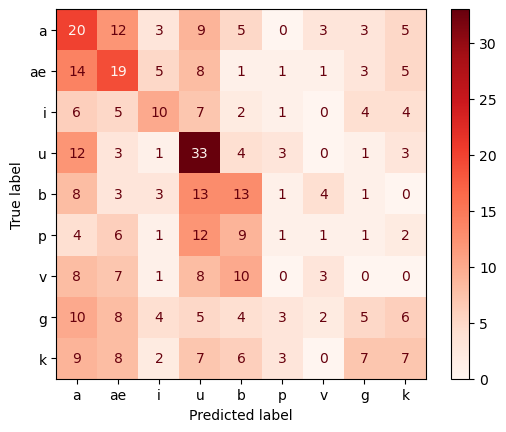

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cmat = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=phon_labels)
disp.plot(cmap='Reds')
plt.show()

In [7]:
np.mean(utils.load_pkl('../acc_data/tr_subsamp_accs/S14_pAll_joint_pca_pooled.pkl')['accs'])

0.24787285506947745

# Decoding Results

In [1]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [2]:
# DATA_PATH = '/hpc/home/zms14/workspace/outputs/alignment_accs/'
DATA_PATH = '/hpc/home/zms14/data/results/decoding/'
# DATA_PATH = '/hpc/home/zms14/repos/RNN_phoneme_decoding_micro/phoneme_encoder_decoder/acc_data/tr_subsamp_accs/'
# DATA_PATH = 'C:/Users/Zac/OneDrive - Duke University/workspace/outputs/alignment_accs/'

In [3]:
import sys
sys.path.insert(0, '..')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import alignment.alignment_utils as utils

In [5]:
from sklearn.metrics import confusion_matrix

def cmat_acc(y_true, y_pred):
    cmat = confusion_matrix(y_true, y_pred)
    acc_cmat = np.trace(cmat) / np.sum(cmat)
    return acc_cmat

def cmat_wrap(y_true_iter, y_pred_iter):
    accs = []
    for y_true, y_pred in zip(y_true_iter, y_pred_iter):
        accs.append(cmat_acc(y_true, y_pred))
    return np.array(accs)

## Plotting Definitions

Plotly default color list

In [6]:
px_colors = [
             '#636EFA',
             '#EF553B',
             '#990099',
            #  '#B6E880',
            #  '#72B7B2',
            #  '#00CC96',
            #  '#FFA15A',
             '#19D3F3',
             '#FF6692',
             '#B6E880',
             '#FF97FF',
             '#FECB52',
            ]

In [7]:
px_default = px.colors.qualitative.Plotly

In [8]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [9]:
def line(error_y_mode=None, **kwargs):
    """Extension of `plotly.express.line` to use error bands.
    
    From https://stackoverflow.com/questions/69587547/continuous-error-band-with-plotly-express-in-python, user171780"""
    ERROR_MODES = {'bar','band','bars','bands',None}
    if error_y_mode not in ERROR_MODES:
        raise ValueError(f"'error_y_mode' must be one of {ERROR_MODES}, received {repr(error_y_mode)}.")
    if error_y_mode in {'bar','bars',None}:
        fig = px.line(**kwargs)
    elif error_y_mode in {'band','bands'}:
        if 'error_y' not in kwargs:
            raise ValueError(f"If you provide argument 'error_y_mode' you must also provide 'error_y'.")
        figure_with_error_bars = px.line(**kwargs)
        fig = px.line(**{arg: val for arg,val in kwargs.items() if arg != 'error_y'})
        for data in figure_with_error_bars.data:
            x = list(data['x'])
            y_upper = list(data['y'] + data['error_y']['array'])
            y_lower = list(data['y'] - data['error_y']['array'] if data['error_y']['arrayminus'] is None else data['y'] - data['error_y']['arrayminus'])
            color = f"rgba({tuple(int(data['line']['color'].lstrip('#')[i:i+2], 16) for i in (0, 2, 4))},.3)".replace('((','(').replace('),',',').replace(' ','')
            fig.add_trace(
                go.Scatter(
                    x = x+x[::-1],
                    y = y_upper+y_lower[::-1],
                    fill = 'toself',
                    fillcolor = color,
                    line = dict(
                        color = 'rgba(255,255,255,0)'
                    ),
                    hoverinfo = "skip",
                    showlegend = False,
                    legendgroup = data['legendgroup'],
                    xaxis = data['xaxis'],
                    yaxis = data['yaxis'],
                )
            )
        # Reorder data as said here: https://stackoverflow.com/a/66854398/8849755
        reordered_data = []
        for i in range(int(len(fig.data)/2)):
            reordered_data.append(fig.data[i+int(len(fig.data)/2)])
            reordered_data.append(fig.data[i])
        fig.data = tuple(reordered_data)
    return fig

## Single Pt Analysis

### Boxplot

In [17]:
from torch import tensor

test1 = [tensor(0.5000), tensor(0.3636), tensor(0.2727), tensor(0.4545), tensor(0.3182), tensor(0.4545), tensor(0.4091), tensor(0.2273), tensor(0.2727), tensor(0.4091), tensor(0.2727), tensor(0.3182), tensor(0.3333), tensor(0.3333), tensor(0.4762), tensor(0.3333), tensor(0.2857), tensor(0.3810), tensor(0.3810), tensor(0.3810)]

test2 = [tensor(0.1364), tensor(0.2727), tensor(0.1818), tensor(0.1818), tensor(0.1364), tensor(0.1818), tensor(0.1818), tensor(0.1818), tensor(0.1818), tensor(0.2273), tensor(0.2727), tensor(0.1818), tensor(0.1905), tensor(0.1905), tensor(0.2857), tensor(0.2857), tensor(0.2857), tensor(0.2857), tensor(0.3333), tensor(0.2857)]

svm_cca = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/S14/cca/S14_pAll_pooled_ccaAligned_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])

In [18]:
pt = 'S14'
# pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
pInd_list = [-1]
# pInd_list = [1]
noS23 = False
noS23_str = "_noS23" if noS23 and pt != "S23" else ""

wide_dfs = []
long_dfs = []
for p_ind in pInd_list:
    p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

    # p_tar = np.zeros((3, 50))
    # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
    # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned_rbf_noCV{noS23_str}.pkl')['accs']
    # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/cca/{pt}_{p_str}_pooled_ccaAlignedNew_rbf_noCV{noS23_str}.pkl')['accs']
    # # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned_rbf_noCV{noS23_str}.pkl')['accs']
    # # p_tar[4,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/jointPCA/{pt}_{p_str}_pooled_jointPCA_rbf_noCV{noS23_str}.pkl')['accs']
    # # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - Unaligned', 'Pooled - CCA-Aligned', 'Pooled - MCCA-Aligned', 'Pooled - Joint PCA'])
    # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - Unaligned', 'Pooled - CCA-Aligned'])

    p_tar = np.zeros((2, 20))
    p_tar[0,:] = test2
    p_tar[1,:] = test1
    decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - CCA-Aligned'])

    # p_tar = np.zeros((2, 50))
    # # p_tar[0,:] =  cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_lda_noCV_ncPCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbf_noCV_ncPCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbf_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # p_tar[4,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_ncPCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # p_tar[5,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # decode_df = pd.DataFrame(p_tar.T, columns=['LDA (ncPCA)', 'LDA (PCA)', 'RBF (ncPCA)', 'RBF (PCA)', 'Bagged RBF (ncPCA)', 'Bagged RBF (PCA)'])
    # # decode_df = pd.DataFrame(p_tar.T, columns=['SVM (5 fold)', 'SVM (20 fold)'])
    # decode_df = pd.DataFrame(p_tar.T, columns=['LDA', 'SVM'])

    # p_tar = np.zeros((4, 50))
    # p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_ncPCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_rbfBag_noCV_ncPCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[2,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[3,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # p_tar[4,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_ncPCA_20fold.pkl')['accs']
    # # p_tar[5,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_PCA_20fold.pkl')['accs']
    # # decode_df = pd.DataFrame(p_tar.T, columns=['PS (LDA, ncPCA)', 'CCA (LDA, ncPCA)', 'PS (LDA, PCA)', 'CCA (LDA, PCA)'])
    # decode_df = pd.DataFrame(p_tar.T, columns=['PS (SVM, ncPCA)', 'CCA (SVM, ncPCA)', 'PS (SVM, PCA)', 'CCA (SVM, PCA)'])

    # p_tar = np.zeros((6, 50))
    # p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[2,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/unaligned/{pt}_{p_str}_pooled_unaligned_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[3,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[4,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # p_tar[5,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/unaligned/{pt}_{p_str}_pooled_unaligned_rbfBag_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
    # # decode_df = pd.DataFrame(p_tar.T, columns=['PS (LDA, ncPCA)', 'CCA (RBF, ncPCA)', 'PS (LDA, PCA)', 'CCA (RBF, PCA)'])
    # decode_df = pd.DataFrame(p_tar.T, columns=['PS (LDA, PCA)', 'CCA (LDA, PCA)', 'Unaligned (LDA, PCA)', 'PS (SVM, PCA)', 'CCA (SVM, PCA)', 'Unaligned (SVM, PCA)'])

    wide_dfs.append(decode_df)
    decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
    decode_df['Phoneme Index'] = p_str
    cols = decode_df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    decode_df = decode_df[cols]
    long_dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

In [19]:
decode_df_long

Phoneme Index      Decoding Context  accuracy
0           pAll      Patient-Specific    0.1364
1           pAll      Patient-Specific    0.2727
2           pAll      Patient-Specific    0.1818
3           pAll      Patient-Specific    0.1818
4           pAll      Patient-Specific    0.1364
5           pAll      Patient-Specific    0.1818
6           pAll      Patient-Specific    0.1818
7           pAll      Patient-Specific    0.1818
8           pAll      Patient-Specific    0.1818
9           pAll      Patient-Specific    0.2273
10          pAll      Patient-Specific    0.2727
11          pAll      Patient-Specific    0.1818
12          pAll      Patient-Specific    0.1905
13          pAll      Patient-Specific    0.1905
14          pAll      Patient-Specific    0.2857
15          pAll      Patient-Specific    0.2857
16          pAll      Patient-Specific    0.2857
17          pAll      Patient-Specific    0.2857
18          pAll      Patient-Specific    0.3333
19          pAll      Patient-Specific    0.2857
20          pAll  Pooled - CCA-Aligned    0.5000
21          pAll  Pooled - CCA-Aligned    0.3636
22          pAll  Pooled - CCA-Aligned    0.2727
23          pAll  Pooled - CCA-Aligned    0.4545
24          pAll  Pooled - CCA-Aligned    0.3182
25          pAll  Pooled - CCA-Aligned    0.4545
26          pAll  Pooled - CCA-Aligned    0.4091
27          pAll  Pooled - CCA-Aligned    0.2273
28          pAll  Pooled - CCA-Aligned    0.2727
29          pAll  Pooled - CCA-Aligned    0.4091
30          pAll  Pooled - CCA-Aligned    0.2727
31          pAll  Pooled - CCA-Aligned    0.3182
32          pAll  Pooled - CCA-Aligned    0.3333
33          pAll  Pooled - CCA-Aligned    0.3333
34          pAll  Pooled - CCA-Aligned    0.4762
35          pAll  Pooled - CCA-Aligned    0.3333
36          pAll  Pooled - CCA-Aligned    0.2857
37          pAll  Pooled - CCA-Aligned    0.3810
38          pAll  Pooled - CCA-Aligned    0.3810
39          pAll  Pooled - CCA-Aligned    0.3810

In [20]:
# get the mean and std of each decoding context and subject in decoding_df
# decode_df_long.groupby(['Patient', 'Phoneme Index', 'Decoding Context']).agg({'accuracy': ['mean', 'std']})
decode_df_long.groupby(['Phoneme Index', 'Decoding Context']).agg({'accuracy': ['mean', 'std']})

accuracy          
                                        mean       std
Phoneme Index Decoding Context                        
pAll          Patient-Specific      0.223045  0.058837
              Pooled - CCA-Aligned  0.358870  0.075645

In [23]:
fig = px.box(decode_df_long, color='Decoding Context', y="accuracy", points='all', width=700, height=500, color_discrete_sequence=[px_colors[0], px_colors[2]])
# fig = px.box(decode_df_long, color='Decoding Context', y="accuracy", x='Phoneme Index', points='all', width=1300, height=650, color_discrete_sequence=px_colors)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.add_hline(y=svm_cca.mean(), line_dash='dash', line_color='green', annotation_text='Cross-patient SVM', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='top',
        y=0.98,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text=f'Transformer Speech Decoding (S1)',
    title_x=0.5,
    font=dict(size=20, family='Arial')
)
fig.update_xaxes(
    title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # tickvals=[0,1],
    range=[-0.5, 0.7],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.6]
)
fig.show()

### Confusion Matrix

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [79]:
pt = 'S14'
pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
# pInd_list = [-1]
noS23 = False
noS23_str = "_noS23" if noS23 and pt != "S23" else ""
# cnds = {'ptSpecific': 'ptSpecific', 'cca':'pooled_ccaAlignedNew', 'mcca': 'pooled_mccaAligned', 'jointPCA': 'pooled_jointPCA'}
cnds = {'ptSpecific': 'ptSpecific', 'cca':'pooled_ccaAligned'}

thresh = 0.02

cmats = {}
for p_ind in pInd_list:
    p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

    cmats_p = {}
    for cnd_k, cnd_v in cnds.items():
        if cnd_k == 'ptSpecific':
            # y_true, y_pred = [utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']]
            y_true, y_pred = [utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']]
        else:
            # y_true, y_pred = [utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/{cnd_k}/{pt}_{p_str}_{cnd_v}_rbf_noCV{noS23_str}.pkl')[k] for k in ['y_true', 'y_pred']]
            y_true, y_pred = [utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/{cnd_k}/{pt}_{p_str}_{cnd_v}_lda_noCV_PCA_20fold.pkl')[k] for k in ['y_true', 'y_pred']]
        y_true = np.array(y_true).flatten()
        y_pred = np.array(y_pred).flatten()
        cmat = confusion_matrix(y_true, y_pred, normalize='true')
        # cmat[np.where(cmat < thresh)] = 0
        cmats_p[cnd_k] = cmat*100
    cmats[p_str] = cmats_p


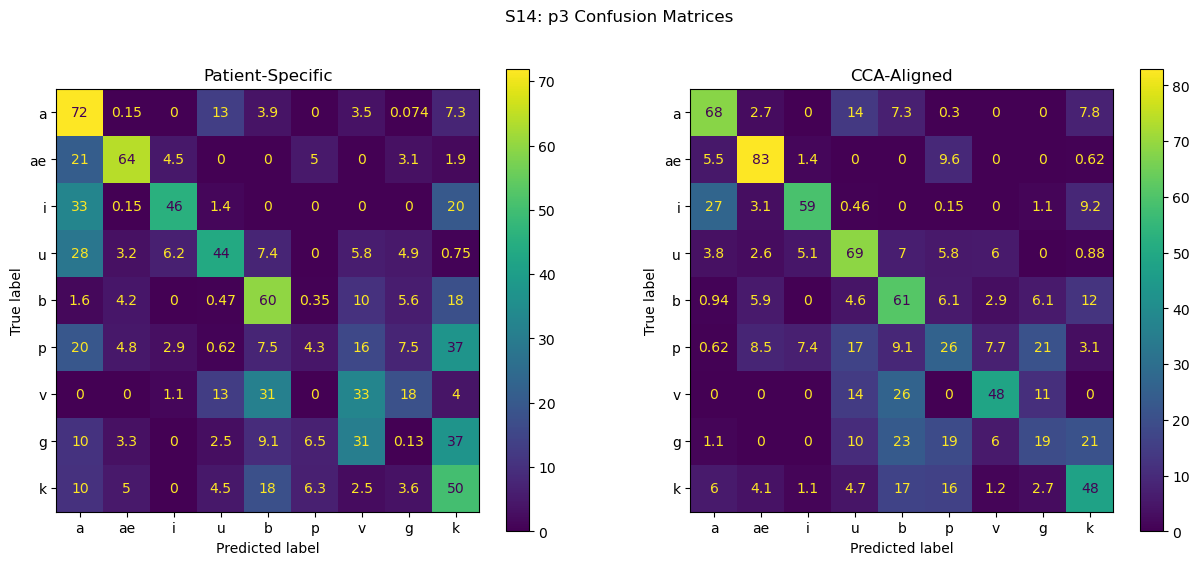

In [80]:
p_lab = 'p3'

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
disp = ConfusionMatrixDisplay(cmats[p_lab]['ptSpecific'], display_labels=phon_labels)
disp.plot(cmap='viridis', ax=ax1)
ax1.set_title('Patient-Specific')

disp = ConfusionMatrixDisplay(cmats[p_lab]['cca'], display_labels=phon_labels)
disp.plot(cmap='viridis', ax=ax2)
ax2.set_title('CCA-Aligned')

plt.suptitle(f'{pt}: {p_lab} Confusion Matrices')
plt.show()

### S23 Figure

In [13]:
j_pt = 'S23'

j_tar = np.zeros((4, 50))
j_tar[0,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_sep_pca_pt-specific.pkl')['accs']
j_tar[1,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_joint_pca_pt-specific.pkl')['accs']
j_tar[2,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_sep_pca_unaligned.pkl')['accs']
j_tar[3,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_joint_pca_unaligned.pkl')['accs']

In [14]:
decode_df = pd.DataFrame(j_tar.T, columns=['Separate PCA_Patient-Specific', 'Joint PCA_Patient-Specific', 'Separate PCA_Pooling - No CCA', 'Joint PCA_Pooling - No CCA'])
decode_df = pd.melt(decode_df, var_name='Context', value_name='accuracy')
decode_df[['PCA-type', 'Decoding Context']] = decode_df['Context'].str.split(pat='_', n=1, expand=True)
decode_df = decode_df.drop(columns=['Context'])
decode_df = decode_df[['PCA-type', 'Decoding Context', 'accuracy']]

In [15]:
decode_df

PCA-type  Decoding Context  accuracy
0    Separate PCA  Patient-Specific  0.174804
1    Separate PCA  Patient-Specific  0.176787
2    Separate PCA  Patient-Specific  0.186669
3    Separate PCA  Patient-Specific  0.185849
4    Separate PCA  Patient-Specific  0.185899
..            ...               ...       ...
195     Joint PCA  Pooling - No CCA  0.217518
196     Joint PCA  Pooling - No CCA  0.234408
197     Joint PCA  Pooling - No CCA  0.205967
198     Joint PCA  Pooling - No CCA  0.234159
199     Joint PCA  Pooling - No CCA  0.229212

[200 rows x 3 columns]

In [16]:
import plotly.express as px
import seaborn as sns

# fig = px.box(decode_df, x='decoding_type', y="accuracy", color='decoding_type', points='all', width=700, height=500)
fig = px.box(decode_df, x='Decoding Context', y="accuracy", color='PCA-type', points='all', width=600, height=500)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.02,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text='S3 Phoneme Decoding',
    # title_text='Decoder Trained on Target Patient',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1],
    range=[-0.5, 1.5],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.3]
)
fig.show()

#### Experimental

In [132]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

# Create a Box plot trace for each column
for i in range(0, len(pd.unique(decode_df['decoding_type']))):
    fig.add_trace(go.Violin(x=decode_df['decoding_type'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                            y=decode_df['accuracy'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                            points='all',  # Show all data points
                            box_visible=False,
                            side='negative',
                            pointpos=0.45,  # Position points at their value
                            jitter=0.3,   # Add jitter for better visualization
                        ))
    fig.add_trace(go.Box(x=[i]*len(decode_df['decoding_type'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]]),
                         y=decode_df['accuracy'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                         width=0.25
                        ))

# fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.5,
                  violinmode='overlay',
                  width=600,
                  height=500,
                  showlegend=False,
                  plot_bgcolor='white'
                  )
fig.update_xaxes(
    title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1,2],
    ticktext=['Patient-specific', 'Cross-patient', 'Cross-patient,<br>domain-adapted'],
)
fig.update_yaxes(
    title='Decoding<br>Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.55]
)
fig.show()

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



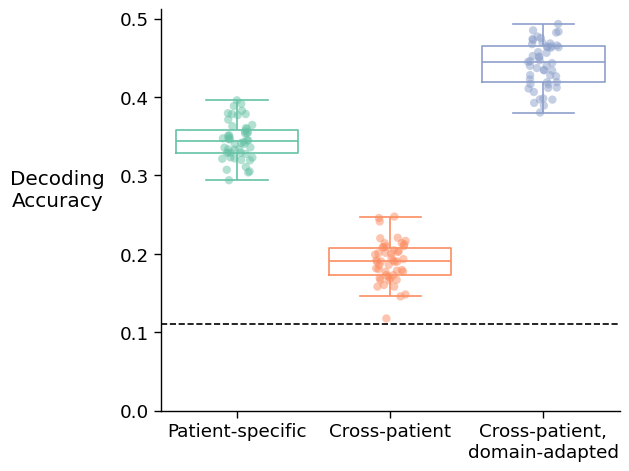

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot using Seaborn
# plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.5)
g1 = sns.catplot(x='decoding_type', y='accuracy', hue='decoding_type', data=decode_df, kind='box', legend=False, palette='Set2', fliersize=0, aspect=1.2, fill=False)
g2 = sns.stripplot(x='decoding_type', y='accuracy', data=decode_df, jitter=True, alpha=0.5, size=6, hue='decoding_type', palette='Set2')
g1.refline(y=1/9, color='black', linestyle='--', label='Chance')

# Customize the plot
# plt.title('Cross-Patient Decoding')
plt.xlabel('')
plt.ylabel('Decoding\nAccuracy', rotation=0, labelpad=45)
g1.set_xticklabels(['Patient-specific', 'Cross-patient', 'Cross-patient,\ndomain-adapted'])
plt.ylim(bottom=0)  # You can adjust the y-axis limits as needed

# Show the plot
sns.despine()
plt.show()

## Multi Pt Boxplot

In [11]:
import pandas as pd

no_S23 = False
# pt_list = ['S14', 'S26', 'S33', 'S22'] if no_S23 else ['S14', 'S26', 'S23', 'S33', 'S22']
pt_list = ['S14', 'S26', 'S33', 'S23', 'S22', 'S39', 'S58', 'S62']
# pt_list = ['S14', 'S26', 'S33']
# pInd_list = [-1, 1, 2, 3]
pInd_list = [-1]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

        # p_tar = np.zeros((3, 50))
        # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
        # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
        # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
        # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - CCA-Aligned'])

        # p_tar = np.zeros((2, 50))
        # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
        # # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned{"_noS23" if no_S23 else ""}_noTar.pkl')['accs']
        # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned{"_noS23" if no_S23 else ""}_noTar.pkl')['accs']
        # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - CCA-Aligned'])

        # p_tar = np.zeros((3, 50))
        # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
        # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned_rbf_noCV.pkl')['accs']
        # # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')['accs']
        # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')['accs']
        # # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned_rbf_noCV.pkl')['accs']
        # # p_tar[4,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/jointPCA/{pt}_{p_str}_pooled_jointPCA_rbf_noCV.pkl')['accs']
        # # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned', 'Pooling - Joint PCA'])
        # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - CCA'])
        # # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - CCA (3 pts)', 'Pooling - CCA (7 pts)'])

        
        p_tar = np.zeros((3, 50))
        p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])
        p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])
        p_tar[2,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])
        decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - CCA'])


        wide_dfs.append(decode_df)
        decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
        decode_df['Patient'] = pt
        decode_df['Phoneme Index'] = p_str
        cols = decode_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        decode_df = decode_df[cols]
        long_dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

In [12]:
decode_df_long

Phoneme Index  Decoding Context  accuracy Patient
0            pAll  Patient-Specific  0.398148     S14
1            pAll  Patient-Specific  0.388889     S14
2            pAll  Patient-Specific  0.379630     S14
3            pAll  Patient-Specific  0.365741     S14
4            pAll  Patient-Specific  0.370370     S14
..            ...               ...       ...     ...
145          pAll     Pooling - CCA  0.307116     S62
146          pAll     Pooling - CCA  0.297753     S62
147          pAll     Pooling - CCA  0.312734     S62
148          pAll     Pooling - CCA  0.301498     S62
149          pAll     Pooling - CCA  0.320225     S62

[1200 rows x 4 columns]

In [13]:
# get the mean and std of each decoding context and subject in decoding_df
# decode_df_long.groupby(['Patient', 'Phoneme Index', 'Decoding Context']).agg({'accuracy': ['mean', 'std']})
decode_df_long.groupby(['Phoneme Index', 'Decoding Context']).agg({'accuracy': ['mean', 'std']})


accuracy          
                                       mean       std
Phoneme Index Decoding Context                       
pAll          Patient-Specific     0.241304  0.105700
              Pooling - CCA        0.304134  0.132390
              Pooling - Unaligned  0.190847  0.065708

In [73]:
import plotly.express as px
import seaborn as sns

fig_ind = 'pAll'
fig_df = decode_df_long[decode_df_long['Phoneme Index'] == fig_ind]
# test_colors = ['#636EFA', rgb2hex(220,176,242), '#AB63FA']
fig = px.box(fig_df, x='Patient', y="accuracy", color='Decoding Context', points='all', width=900, height=600, color_discrete_sequence=px_colors)
# fig = px.box(decode_df, x='Patient', y="accuracy", color='Decoding Context', points='all', width=1200, height=2400, color_discrete_sequence=px_colors, facet_row='Phoneme Index')
# fig = px.box(decode_df, x='subject', y="accuracy", color='Decoding Context', points='all', width=850, height=500, color_discrete_sequence=px_colors[1:])
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
# fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.02,
        xanchor='left',
        x=0.01,
        title_text=''
    ),
    # showlegend=False,
    # title_text=f'Phoneme Decoding - Target Patient in Training Set',
    title_text=f'Decoder Trained on Target Patient',
    # title_text='All Phonemes - Pooled Decoding',
    # title_text=f'Aligned Decoding Accuracy With Varied Amounts of Pooled Patients',
    # title_text='Decoder Only Trained on Non-Target Patients',
    title_x=0.5,
    font=dict(size=20, family='Arial')
)
fig.update_xaxes(
    title='Target Patient',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # tickvals=[0,1,2,3],
    # ticktext=['S1', 'S2', 'S3', 'S4'],
    # range=[-0.5, 4.5],
    tickvals=[0,1,2],
    ticktext=['S1', 'S2', 'S4'],
    range=[-0.5, 2.5]
)
fig.update_yaxes(
    title='Decoding Accuracy',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.6]
)
fig.show()

ANOVA & Followup tests between conditions

In [19]:
from scipy.stats import f_oneway, tukey_hsd, false_discovery_control

pts = ['S14', 'S26', 'S33']
p_arr = np.zeros((len(pts), 3))
for i, pt in enumerate(pts):
    pt_spf = decode_df_long[(decode_df_long['Patient'] == pt) & (decode_df_long['Decoding Context'] == 'Patient-Specific')]['accuracy']
    pt_una = decode_df_long[(decode_df_long['Patient'] == pt) & (decode_df_long['Decoding Context'] == 'Pooling - Unaligned')]['accuracy']
    pt_cca = decode_df_long[(decode_df_long['Patient'] == pt) & (decode_df_long['Decoding Context'] == 'Pooling - CCA')]['accuracy']

    stat, anova_p = f_oneway(pt_spf, pt_una, pt_cca)
    res = tukey_hsd(pt_spf, pt_una, pt_cca)
    cca_ps_p = res.pvalue[0,2]
    cca_una_p = res.pvalue[1,2]

    p_arr[i, :] = [anova_p, cca_ps_p, cca_una_p]

    print(f'{pt} (Uncorrected): ANOVA p = {anova_p}, CCA vs. PS p = {cca_ps_p}, CCA vs. Unaligned p = {cca_una_p}')

# Correct for multiple comparisons
corrected_pvals = false_discovery_control(p_arr.flatten()).reshape(p_arr.shape)
print()

for i, pt in enumerate(pts):
    print(f'{pt} (Corrected): ANOVA p = {corrected_pvals[i,0]}, CCA vs. PS p = {corrected_pvals[i,1]}, CCA vs. Unaligned p = {corrected_pvals[i,2]}')



S14 (Uncorrected): ANOVA p = 3.0905695148538066e-79, CCA vs. PS p = 4.645736373376508e-08, CCA vs. Unaligned p = 2.1538326677728037e-14
S26 (Uncorrected): ANOVA p = 4.852176510710521e-123, CCA vs. PS p = 2.1538326677728037e-14, CCA vs. Unaligned p = 2.1538326677728037e-14
S33 (Uncorrected): ANOVA p = 5.081064515210952e-109, CCA vs. PS p = 2.1538326677728037e-14, CCA vs. Unaligned p = 2.1538326677728037e-14

S14 (Corrected): ANOVA p = 9.271708544561419e-79, CCA vs. PS p = 4.645736373376508e-08, CCA vs. Unaligned p = 2.423061751244404e-14
S26 (Corrected): ANOVA p = 4.366958859639469e-122, CCA vs. PS p = 2.423061751244404e-14, CCA vs. Unaligned p = 2.423061751244404e-14
S33 (Corrected): ANOVA p = 2.2864790318449283e-108, CCA vs. PS p = 2.423061751244404e-14, CCA vs. Unaligned p = 2.423061751244404e-14


In [14]:
decode_df_long[(decode_df_long['Decoding Context'] == 'Pooling - CCA') | (decode_df_long['Decoding Context'] == 'Patient-Specific')].groupby(['Patient', 'Decoding Context']).agg({'accuracy': 'mean'}).reset_index()

Patient  Decoding Context  accuracy
0      S14  Patient-Specific  0.379120
1      S14     Pooling - CCA  0.395833
2      S22  Patient-Specific  0.137969
3      S22     Pooling - CCA  0.169183
4      S23  Patient-Specific  0.167947
5      S23     Pooling - CCA  0.211435
6      S26  Patient-Specific  0.393559
7      S26     Pooling - CCA  0.452838
8      S33  Patient-Specific  0.294638
9      S33     Pooling - CCA  0.527971
10     S39  Patient-Specific  0.182141
11     S39     Pooling - CCA  0.221995
12     S58  Patient-Specific  0.096028
13     S58     Pooling - CCA  0.148794
14     S62  Patient-Specific  0.279026
15     S62     Pooling - CCA  0.305019

Pooled across all patients

In [15]:
fig_df = decode_df_long[(decode_df_long['Decoding Context'] == 'Pooling - CCA') | (decode_df_long['Decoding Context'] == 'Patient-Specific')].groupby(['Patient', 'Decoding Context']).agg({'accuracy': 'mean'}).reset_index()
pt_name_conv = {'S14': 'S1', 'S26': 'S2', 'S23': 'S3', 'S33': 'S4', 'S22': 'S5', 'S39': 'S6', 'S58': 'S7', 'S62': 'S8'}
fig_df['Patient'] = fig_df['Patient'].apply(lambda x: pt_name_conv[x])
fig_df = fig_df.sort_values(by='Patient')
fig = px.line(fig_df, x='Decoding Context', y="accuracy", color='Patient', width=800, height=500, color_discrete_sequence=px.colors.qualitative.Plotly[1:])
fig.update_traces(mode='lines')
fig.add_traces(px.box(fig_df, x='Decoding Context', y="accuracy").data)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
# fig = px.box(corr_df, x='Condition', y="Correlation", width=800, height=500)
# fig.add_traces(px.line(corr_df, x='Condition', y="Correlation", color='Patient', error_y='Error').data)
# fig.update_traces(mode='markers+lines')
# fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='top',
        y=0.98,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text=f'Cross-Patient Decoding Accuracy',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # tickvals=[0,1],
    range=[-0.35, 1.35],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.62]
)
fig.show()

In [59]:
import scipy.stats as stats

# test for significant difference between unaligned and aligned correlations
stat_df = decode_df_long[(decode_df_long['Decoding Context'] == 'Pooling - CCA') | (decode_df_long['Decoding Context'] == 'Patient-Specific')]
res = stats.wilcoxon(stat_df[stat_df['Decoding Context'] == 'Patient-Specific']['accuracy'], stat_df[stat_df['Decoding Context'] == 'Pooling - CCA']['accuracy'], alternative='less')
print(res)

res_mwu = stats.mannwhitneyu(stat_df[stat_df['Decoding Context'] == 'Patient-Specific']['accuracy'], stat_df[stat_df['Decoding Context'] == 'Pooling - CCA']['accuracy'], alternative='less')
print(res_mwu)

WilcoxonResult(statistic=658.5, pvalue=1.2877576213215956e-64)
MannwhitneyuResult(statistic=56233.0, pvalue=1.7637156354043193e-13)


In [203]:
fig_ind = 'pAll'
fig_df = decode_df_long[decode_df_long['Phoneme Index'] == fig_ind]
# test_colors = ['#636EFA', rgb2hex(220,176,242), '#AB63FA']
fig = px.box(fig_df, x='Decoding Context', y="accuracy", width=1200, height=600)
fig.show()

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



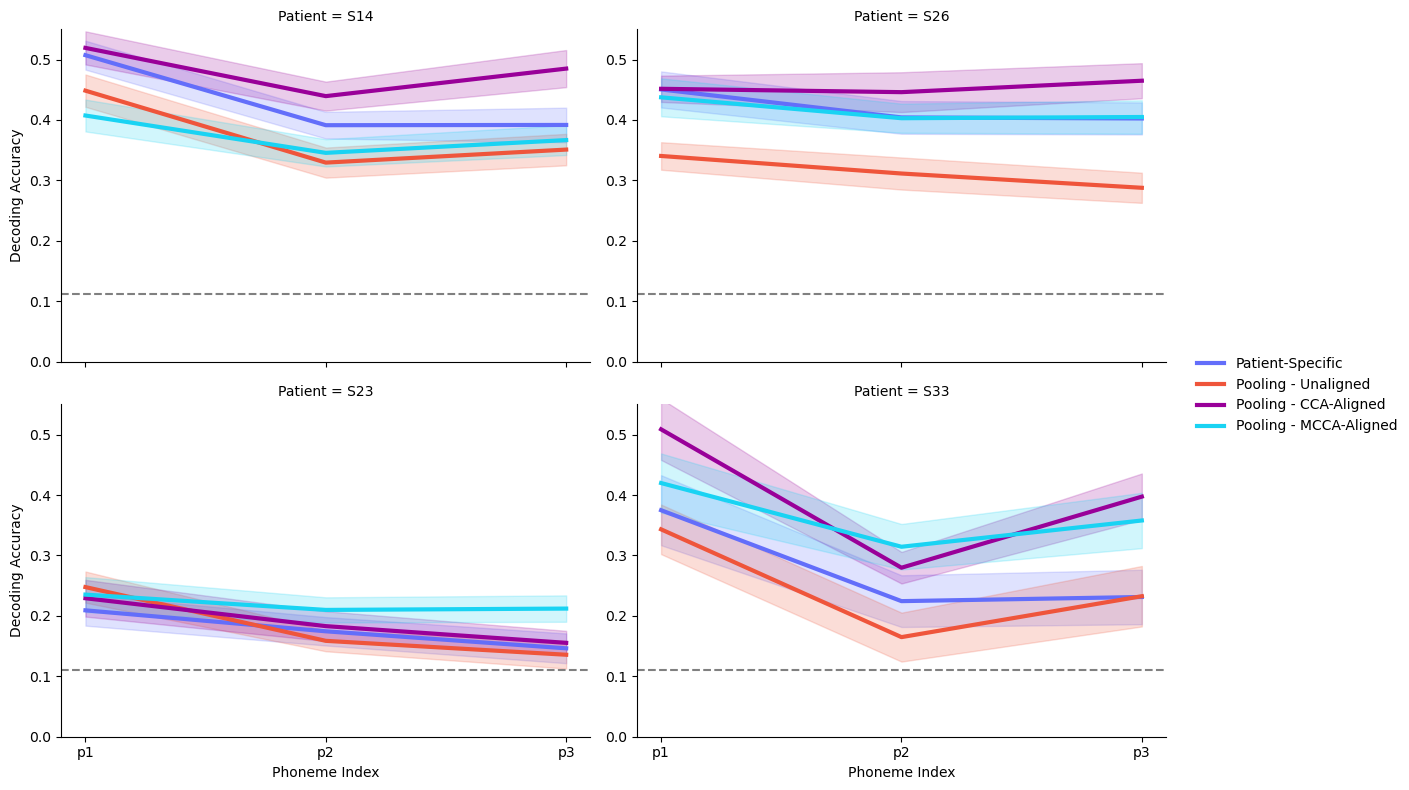

In [118]:
fig_df = decode_df_long[decode_df_long['Phoneme Index'] != 'pAll']

g = sns.FacetGrid(fig_df, col='Patient', col_wrap=2, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot,
                x='Phoneme Index',
                y='accuracy',
                hue='Decoding Context',
                palette=px_colors[:len(np.unique(fig_df['Decoding Context']))],
                markers=True,
                # err_style='bars',
                errorbar='sd',
                linewidth=3,
                )
g.refline(y=1/9, linestyle='--', color='grey')
g.add_legend()
g.set_axis_labels('Phoneme Index', 'Decoding Accuracy')
g.set(ylim=(0, 0.55))
g.tight_layout()
plt.show()

# sns.relplot(fig_df, x='Phoneme Index', y='accuracy', hue='Decoding Context', row='Patient', kind='line', aspect=2, height=3, palette=px_colors)
# ax = plt.gca()
# ax.axhline(1/9, color='grey', linestyle='--', label='Chance', linewidth=2)
# plt.show()


In [100]:
# diff_df = decode_df_wide.copy()
# diff_df['CCA - Patient-Specific'] = diff_df['Pooling - CCA-Aligned'] - diff_df['Patient-Specific']
# diff_df['MCCA - Patient-Specific'] = diff_df['Pooling - MCCA-Aligned'] - diff_df['Patient-Specific']
# diff_df.drop(columns=['Patient-Specific', 'Pooling - Unaligned' 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'], axis=1, inplace=True)
# diff_df

diff_df = decode_df_long.groupby(['Decoding Context', 'Phoneme Index', 'Patient']).mean().reset_index()
diff_df = diff_df[(diff_df['Decoding Context'] == 'Patient-Specific') | (diff_df['Decoding Context'] == 'Pooling - CCA-Aligned') | (diff_df['Decoding Context'] == 'Pooling - MCCA-Aligned')]
diff_df = diff_df.pivot(index=['Patient', 'Phoneme Index'], columns='Decoding Context', values='accuracy').reset_index()
diff_df['CCA - Patient-Specific'] = diff_df['Pooling - CCA-Aligned'] - diff_df['Patient-Specific']
diff_df['MCCA - Patient-Specific'] = diff_df['Pooling - MCCA-Aligned'] - diff_df['Patient-Specific']
diff_df.drop(columns=['Patient-Specific', 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'], axis=1, inplace=True)
diff_df

Decoding Context Patient Phoneme Index  CCA - Patient-Specific  \
0                    S14            p1                0.012067   
1                    S14            p2                0.048112   
2                    S14            p3                0.093273   
3                    S14          pAll                0.031597   
4                    S23            p1                0.020024   
5                    S23            p2                0.008552   
6                    S23            p3                0.009047   
7                    S23          pAll                0.015631   
8                    S26            p1                0.001072   
9                    S26            p2                0.041803   
10                   S26            p3                0.062471   
11                   S26          pAll                0.050352   
12                   S33            p1                0.133889   
13                   S33            p2                0.055312   
14                   S33            p3                0.166123   
15                   S33          pAll                0.177492   

Decoding Context  MCCA - Patient-Specific  
0                               -0.099872  
1                               -0.045797  
2                               -0.025032  
3                               -0.045563  
4                                0.026044  
5                                0.035392  
6                                0.065767  
7                                0.029908  
8                               -0.013050  
9                               -0.001323  
10                               0.002421  
11                              -0.005371  
12                               0.045000  
13                               0.090016  
14                               0.126617  
15                               0.171209

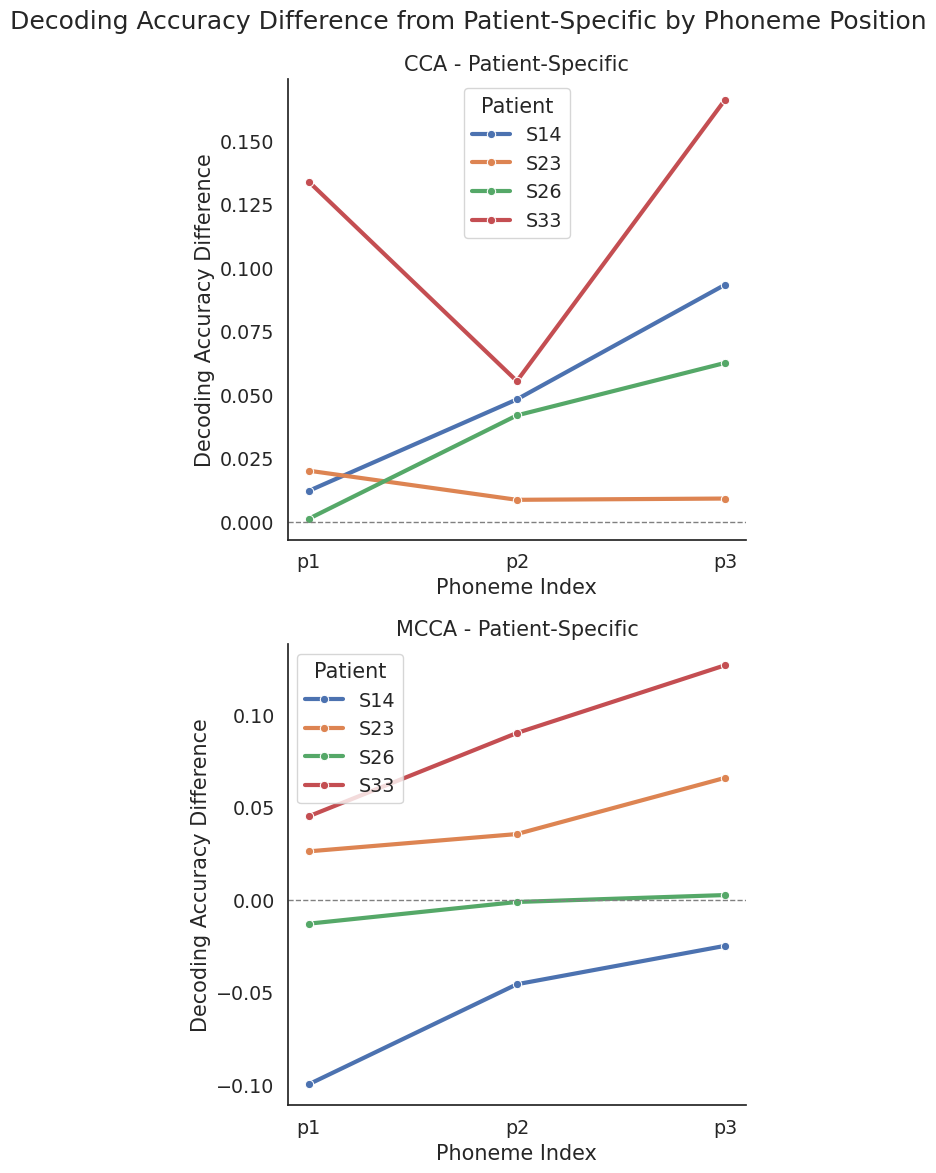

In [127]:
sns.set(style='white', font_scale=1.25)

fig_df = diff_df[diff_df['Phoneme Index'] != 'pAll']
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))
sns.lineplot(data=fig_df, x='Phoneme Index', y='CCA - Patient-Specific', hue='Patient', ax=ax1, linewidth=3, marker='o')
sns.lineplot(data=fig_df, x='Phoneme Index', y='MCCA - Patient-Specific', hue='Patient', ax=ax2, linewidth=3, marker='o')
ax1.axhline(0, color='grey', linestyle='--', linewidth=1)
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)
ax1.set_ylabel('Decoding Accuracy Difference')
ax2.set_ylabel('Decoding Accuracy Difference')
ax1.set_title('CCA - Patient-Specific')
ax2.set_title('MCCA - Patient-Specific')
plt.suptitle('Decoding Accuracy Difference from Patient-Specific by Phoneme Position')
sns.despine()
plt.tight_layout()
plt.show()

## Adding S22 Comparison

In [54]:
import pandas as pd

pt_list = ['S14', 'S26', 'S23', 'S33']
pInd_list = [-1]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

        p_tar = np.zeros((2, 50))

        p_tar[0,:] = utils.load_pkl(DATA_PATH + f'pooled/S22_added/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')['accs']
        p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/S22_added/{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned_rbf_noCV.pkl')['accs']

        decode_df = pd.DataFrame(p_tar.T, columns=['Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'])
        wide_dfs.append(decode_df)

        decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
        decode_df['Patient'] = pt
        decode_df['Phoneme Index'] = p_str
        cols = decode_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        decode_df = decode_df[cols]
        long_dfs.append(decode_df)
decode_df_wS22_wide = pd.concat(wide_dfs)
decode_df_wS22_long = pd.concat(long_dfs)

In [55]:
pt_list = ['S14', 'S26', 'S23', 'S33']
pInd_list = [-1]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

        p_tar = np.zeros((2, 50))
        p_tar[0,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')['accs']
        p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/original_set/{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned_rbf_noCV.pkl')['accs']

        decode_df = pd.DataFrame(p_tar.T, columns=['Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'])
        wide_dfs.append(decode_df)
        decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
        decode_df['Patient'] = pt
        decode_df['Phoneme Index'] = p_str
        cols = decode_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        decode_df = decode_df[cols]
        long_dfs.append(decode_df)
decode_df_noS22_wide = pd.concat(wide_dfs)
decode_df_noS22_long = pd.concat(long_dfs)

In [62]:
diff_noS22_df = decode_df_noS22_long.groupby(['Decoding Context', 'Phoneme Index', 'Patient']).mean().reset_index().drop(columns='Phoneme Index')
diff_wS22_df = decode_df_wS22_long.groupby(['Decoding Context', 'Phoneme Index', 'Patient']).mean().reset_index().drop(columns='Phoneme Index')
diff_df = diff_noS22_df.merge(diff_wS22_df, on=['Patient', 'Decoding Context'], suffixes=('_noS22', '_wS22'))
diff_df_long = pd.melt(diff_df, id_vars=['Patient', 'Decoding Context'], var_name='Patient Context', value_name='accuracy')
diff_df_long['Patient Context'] = diff_df_long['Patient Context'].apply(lambda x: 'Original Set' if x.split('_')[1] == 'noS22' else 'S22 Added')
diff_df_long

Patient        Decoding Context Patient Context  accuracy
0      S14   Pooling - CCA-Aligned    Original Set  0.391705
1      S23   Pooling - CCA-Aligned    Original Set  0.181282
2      S26   Pooling - CCA-Aligned    Original Set  0.420924
3      S33   Pooling - CCA-Aligned    Original Set  0.439470
4      S14  Pooling - MCCA-Aligned    Original Set  0.314545
5      S23  Pooling - MCCA-Aligned    Original Set  0.195559
6      S26  Pooling - MCCA-Aligned    Original Set  0.365201
7      S33  Pooling - MCCA-Aligned    Original Set  0.433187
8      S14   Pooling - CCA-Aligned       S22 Added  0.390267
9      S23   Pooling - CCA-Aligned       S22 Added  0.181092
10     S26   Pooling - CCA-Aligned       S22 Added  0.413548
11     S33   Pooling - CCA-Aligned       S22 Added  0.460041
12     S14  Pooling - MCCA-Aligned       S22 Added  0.323544
13     S23  Pooling - MCCA-Aligned       S22 Added  0.206115
14     S26  Pooling - MCCA-Aligned       S22 Added  0.353128
15     S33  Pooling - MCCA-Aligned       S22 Added  0.440861

/tmp/ipykernel_4043941/1957858069.py:3: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.

/tmp/ipykernel_4043941/1957858069.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



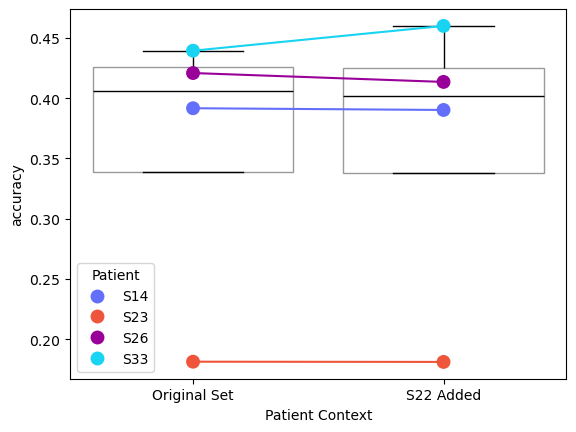

In [75]:
fig_df = diff_df_long[diff_df_long['Decoding Context'] == 'Pooling - CCA-Aligned']
ax = sns.boxplot(x='Patient Context',y='accuracy',data=fig_df, color='w')
ax = sns.swarmplot(x='Patient Context',y='accuracy',hue='Patient',data=fig_df,s=10, palette=px_colors)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

fig_df['flg'] = fig_df['Patient Context'].apply(lambda x: 0 if x == 'Original Set' else 1)
for i, key in enumerate(fig_df.Patient.unique()):
    dfq = fig_df.query('Patient == @key').reset_index()
    ax.plot(dfq['flg'], dfq['accuracy'], color=px_colors[i])
plt.show()


## Single-patient pooling

In [60]:
import pandas as pd

no_S23 = False
pt_list = ['S14', 'S26', 'S33', 'S22'] if no_S23 else ['S14', 'S26', 'S23', 'S33', 'S22']
pInd_list = [-1]

# wide_dfs = []
long_dfs = []
for pt in pt_list:
    # iterate through all other pts in patient list
    for pool_pt in pt_list:
        for p_ind in pInd_list:
            p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

            # p_tar = np.zeros((4, 50))
            # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/ptSpecific/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
            # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/unaligned/{pt}_{p_str}_pooled_unaligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
            # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/cca/{pt}_{p_str}_pooled_ccaAligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
            # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
            p_tar = np.zeros((1, 50))
            # 
            # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'pooled/single_pt_pool/{pt}/unaligned/{pt}_{p_str}_pooled_unaligned_pool[{pool_pt}]_rbf_noCV.pkl')['accs']
            if pt == pool_pt:
                p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
            else:
                p_tar[0,:] = utils.load_pkl(DATA_PATH + f'pooled/single_pt_pool/{pt}/jointPCA/{pt}_{p_str}__pooled_jointPCA_pool[{pool_pt}]_rbf_noCV.pkl')['accs']
            # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'pooled/single_pt_pool/{pt}/jointPCA/{pt}_{p_str}_pooled_unaligned_pool[{pool_pt}]_rbf_noCV.pkl')['accs']
            # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'pooled/S22_added/{pt}/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV.pkl')['accs']
            # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'pooled/S22_added/{pt}/jointPCA/{pt}_{p_str}_pooled_jointPCA_rbf_noCV.pkl')['accs']
            decode_df = pd.DataFrame(p_tar.T, columns=['Pooling - CCA-Aligned'])
            # wide_dfs.append(decode_df)
            decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
            decode_df['Target Patient'] = pt
            decode_df['Pooled Patient'] = pool_pt
            decode_df['Phoneme Index'] = p_str
            cols = decode_df.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            decode_df = decode_df[cols]
            long_dfs.append(decode_df)
# decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

In [61]:
decode_df_long

Phoneme Index       Decoding Context  accuracy Target Patient  \
0           pAll  Pooling - CCA-Aligned  0.380515            S14   
1           pAll  Pooling - CCA-Aligned  0.370823            S14   
2           pAll  Pooling - CCA-Aligned  0.357651            S14   
3           pAll  Pooling - CCA-Aligned  0.346721            S14   
4           pAll  Pooling - CCA-Aligned  0.351522            S14   
..           ...                    ...       ...            ...   
45          pAll  Pooling - CCA-Aligned  0.134346            S22   
46          pAll  Pooling - CCA-Aligned  0.115969            S22   
47          pAll  Pooling - CCA-Aligned  0.116128            S22   
48          pAll  Pooling - CCA-Aligned  0.140621            S22   
49          pAll  Pooling - CCA-Aligned  0.136243            S22   

   Pooled Patient  
0             S14  
1             S14  
2             S14  
3             S14  
4             S14  
..            ...  
45            S22  
46            S22  
47            S22  
48            S22  
49            S22  

[1250 rows x 5 columns]

In [62]:
pool_heatmap_df = decode_df_long.pivot_table(index='Target Patient', columns='Pooled Patient', values='accuracy', aggfunc='mean')
pool_heatmap_df

Pooled Patient       S14       S22       S23       S26       S33
Target Patient                                                  
S14             0.360108  0.331482  0.349811  0.365943  0.368547
S22             0.136794  0.129614  0.122182  0.152273  0.138606
S23             0.194431  0.170430  0.165651  0.197612  0.183774
S26             0.360010  0.368012  0.318062  0.370572  0.405839
S33             0.409858  0.324413  0.338669  0.418790  0.261978

In [63]:
ptSpecific_accs = decode_df_long[decode_df_long['Target Patient'] == decode_df_long['Pooled Patient']].groupby(['Target Patient', 'Phoneme Index', 'Decoding Context', 'Pooled Patient']).mean()
ptSpecific_rows = np.zeros((len(pt_list), len(pt_list)))
ptSpecific_rows[:] = ptSpecific_accs['accuracy'].values
(pool_heatmap_df / ptSpecific_rows.T) - 1

Pooled Patient       S14       S22       S23       S26       S33
Target Patient                                                  
S14             0.000000 -0.079492 -0.028595  0.016205  0.023435
S22             0.055400  0.000000 -0.057333  0.174824  0.069381
S23             0.173737  0.028849  0.000000  0.192946  0.109403
S26            -0.028501 -0.006909 -0.141699  0.000000  0.095169
S33             0.564474  0.238320  0.292739  0.598569  0.000000

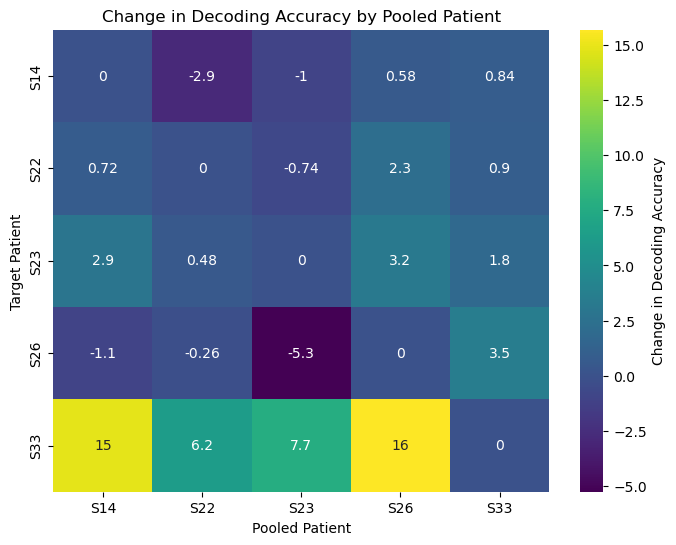

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap((pool_heatmap_df - ptSpecific_rows.T)*100, annot=True, cmap='viridis', cbar_kws={'label': 'Change in Decoding Accuracy'})
# sns.heatmap(((pool_heatmap_df / ptSpecific_rows.T) - 1)*100, annot=True, cmap='viridis', cbar_kws={'label': 'Percent Change in Decoding Accuracy'})
plt.title('Change in Decoding Accuracy by Pooled Patient')
plt.show()

## Pooled Sampling

In [119]:
pt = 'S33'
data_noTar = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/pooled_subsampling/{pt}_pAll_poolSamp_ccaAligned_rbf_noTar_noCV.pkl')
data_tar = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/pooled_subsampling/{pt}_pAll_poolSamp_ccaAligned_rbf_noCV.pkl')
ptSpf_acc = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/{pt}_pAll_ptSpecific_rbf_noCV.pkl')[k] for k in ['y_true', 'y_pred']])


acc_mat_noTar = data_noTar['acc_mat']
trial_vec_noTar = data_noTar['trial_vec']
acc_mat_tar = data_tar['acc_mat']
trial_vec_tar = data_tar['trial_vec']
# trial_lim = np.where(trial_vec > 2900)[0][0]

ps_noTar_df = pd.DataFrame(acc_mat_noTar.T, columns=trial_vec_noTar)
ps_noTar_df = pd.melt(ps_noTar_df, var_name='Cross-Patient Trials', value_name='Decoding Accuracy')

ps_tar_df = pd.DataFrame(acc_mat_tar.T, columns=trial_vec_tar)
ps_tar_df = pd.melt(ps_tar_df, var_name='Cross-Patient Trials', value_name='Decoding Accuracy')

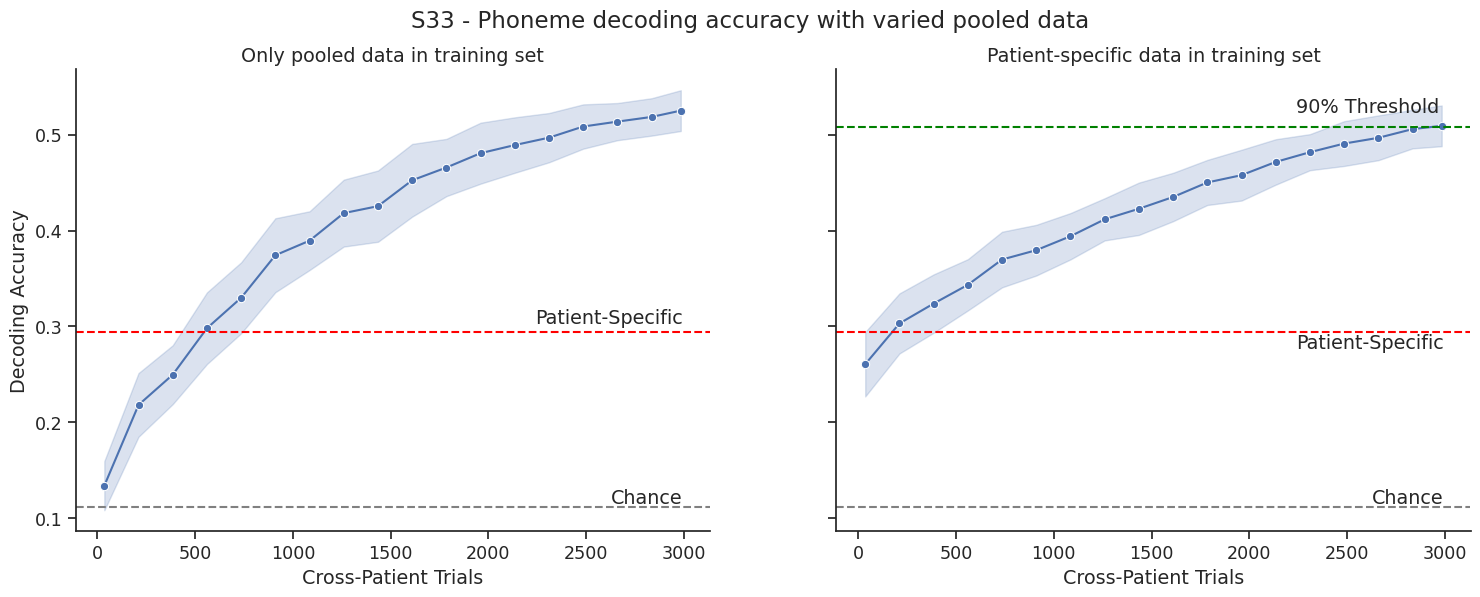

In [124]:
chance_level = 1/9
sat_point = 0.9*ps_tar_df.max()['Decoding Accuracy']

sns.set_theme(context='notebook', font_scale=1.15, style='ticks')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.lineplot(x='Cross-Patient Trials', y='Decoding Accuracy', data=ps_noTar_df, errorbar='sd', ax=ax1, marker='o')
# ax1.axhline(1/9, color='grey', linestyle='--')
# ax1.annotate('Chance', xy=(0.9, 1/9), xytext=(0.88, 1/9), textcoords='axes fraction', arrowprops=dict(facecolor='grey', arrowstyle='->'))
ax1.axhline(chance_level, color='grey', linestyle='--')
ax1.annotate('Chance', xy=(0.9, chance_level), xytext=(0.88*trial_vec_noTar[-1], 1.04*chance_level))
ax1.axhline(np.mean(ptSpf_acc), color='red', linestyle='--')
ax1.annotate('Patient-Specific', xy=(0.9, np.mean(ptSpf_acc)), xytext=(0.75*trial_vec_tar[-1], 1.03*np.mean(ptSpf_acc)))
ax1.set_title('Only pooled data in training set')

sns.lineplot(x='Cross-Patient Trials', y='Decoding Accuracy', data=ps_tar_df, errorbar='sd', ax=ax2, marker='o')
ax2.axhline(chance_level, color='grey', linestyle='--')
# ax2.annotate('Chance', xy=(0.9, 1/9), xytext=(0.88, 1/9), textcoords='axes fraction', arrowprops=dict(facecolor='grey', arrowstyle='->'))
ax2.annotate('Chance', xy=(0.9, chance_level), xytext=(0.88*trial_vec_noTar[-1], 1.04*chance_level))
ax2.axhline(np.mean(ptSpf_acc), color='red', linestyle='--')
ax2.annotate('Patient-Specific', xy=(0.9, np.mean(ptSpf_acc)), xytext=(0.75*trial_vec_noTar[-1], 0.94*np.mean(ptSpf_acc)))
ax2.axhline(sat_point, color='green', linestyle='--')
ax2.annotate('90% Threshold', xy=(0.9, sat_point), xytext=(0.75*trial_vec_noTar[-1], 1.03*sat_point))
ax2.set_title('Patient-specific data in training set')

# ax.set_ylim(0, 0.4)
plt.suptitle(f'{pt} - Phoneme decoding accuracy with varied pooled data')
sns.despine()
plt.show()

In [21]:
from scipy.optimize import curve_fit

x_data = np.repeat(trial_vec, 50)
y_data = acc_mat.flatten()

def f_log(x, a, b):
    return a*np.log(x) + b

def f_lin(x, a, b):
    return a*x + b

popt_log, _ = curve_fit(f_log, x_data, y_data)
res_log = y_data - f_log(x_data, *popt_log)
ss_res_log = np.sum(res_log**2)
ss_tot_log = np.sum((y_data - np.mean(y_data))**2)
r2_log = 1 - (ss_res_log / ss_tot_log)
print(f'Log fit {r2_log}')
log_fit_df = pd.DataFrame({'x': range(1,int(trial_vec[-1])), 'y': f_log(range(1,int(trial_vec[-1])), *popt_log)})

popt_lin, _ = curve_fit(f_lin, x_data, y_data)
res_lin = y_data - f_lin(x_data, *popt_lin)
ss_res_lin = np.sum(res_lin**2)
ss_tot_lin = np.sum((y_data - np.mean(y_data))**2)
r2_lin = 1 - (ss_res_lin / ss_tot_lin)
print(f'Linear fit {r2_lin}')
lin_fit_df = pd.DataFrame({'x': range(1,int(trial_vec[-1])), 'y': f_lin(range(1,int(trial_vec[-1])), *popt_lin)})

Log fit 0.11841970377911637
Linear fit 0.03219493744823687


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

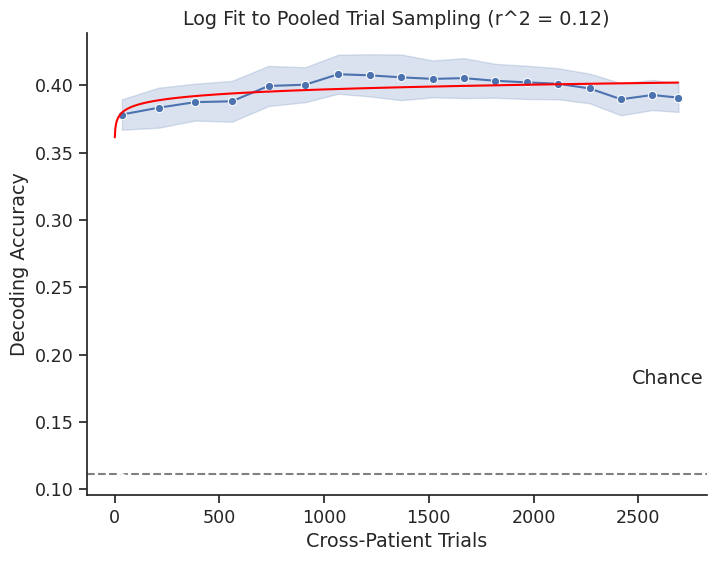

In [22]:

sns.set_theme(context='notebook', font='Verdana', font_scale=1.15, style='ticks')
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x='Cross-Patient Trials', y='Decoding Accuracy', data=ps_df, errorbar='sd', ax=ax, marker='o')
sns.lineplot(x='x', y='y', data=log_fit_df, ax=ax, color='red')
ax.axhline(1/9, color='grey', linestyle='--')
ax.annotate('Chance', xy=(0.9, 1/9), xytext=(0.88, 0.24), textcoords='axes fraction', arrowprops=dict(facecolor='grey', arrowstyle='->'))
# ax.set_ylim(0, 0.40)
plt.title('Log Fit to Pooled Trial Sampling (r^2 = {:.2f})'.format(r2_log))
sns.despine()
plt.show()


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

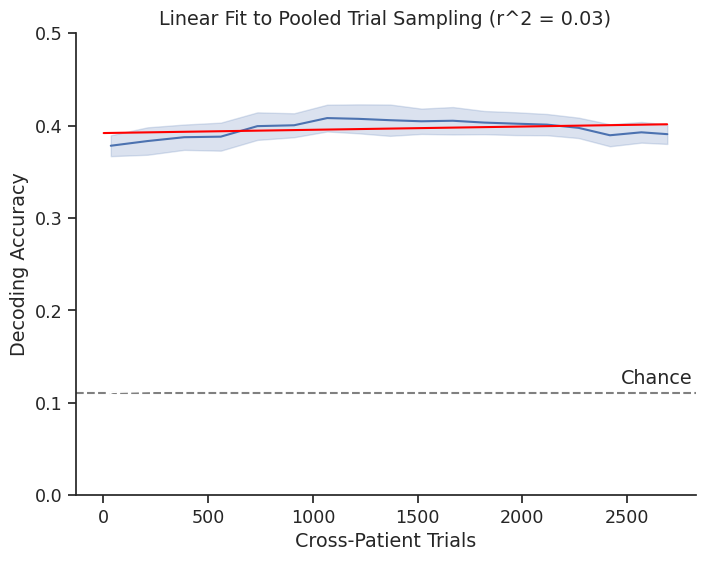

In [23]:

sns.set_theme(context='notebook', font='Verdana', font_scale=1.15, style='ticks')
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(x='Cross-Patient Trials', y='Decoding Accuracy', data=ps_df, errorbar='sd', ax=ax)
sns.lineplot(x='x', y='y', data=lin_fit_df, ax=ax, color='red')
ax.axhline(1/9, color='grey', linestyle='--')
ax.annotate('Chance', xy=(0.9, 1/9), xytext=(0.88, 0.24), textcoords='axes fraction', arrowprops=dict(facecolor='grey', arrowstyle='->'))
ax.set_ylim(0, 0.50)
plt.title('Linear Fit to Pooled Trial Sampling (r^2 = {:.2f})'.format(r2_lin))
sns.despine()
plt.show()

In [68]:
len_data = np.arange(0, 3000, 10)
log_proj = f_log(len_data, *popt)
log_diff = np.diff(log_proj)
log_diff_percent = log_diff / log_proj[:-1]

saturate_idx = np.where(log_diff_percent < 0.01)[0]
print(saturate_idx, len_data[saturate_idx[0]])

[  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 25

/tmp/ipykernel_50957/3645664438.py:7: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b
/tmp/ipykernel_50957/3020463936.py:4: RuntimeWarning: invalid value encountered in divide
  log_diff_percent = log_diff / log_proj[:-1]


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.


findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: F

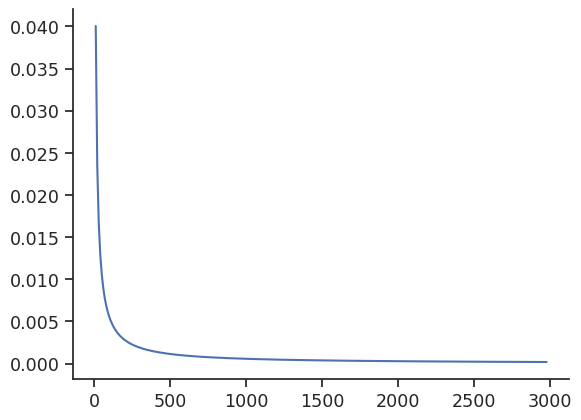

In [67]:
plt.plot(len_data[:-1], log_diff)
sns.despine()
plt.show()

## Pitch Subsampling

In [58]:
# pt_list = ['S14', 'S26', 'S33', 'S58', 'S62']
pt_list = ['S14', 'S22', 'S23', 'S26', 'S33', 'S39', 'S58', 'S62']

# pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
pInd_list = [-1]
# pInd_list = [1]

pitch_list = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1.5]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'
        for pitch in pitch_list:
            if pitch == 1.5:
                pitch_str = '1-5'
            else:
                pitch_str = str(int(pitch))

            p_tar = np.zeros((2, 50))
            p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/pitch_subsampling/{pt}_{p_str}_pitchSubsamp{pitch_str}mm_ptSpecific_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/pitch_subsampling/unaligned/{pt}_{p_str}_pitchSubsamp{pitch}mm_pooled_unaligned_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/pitch_subsampling/cca/{pt}_{p_str}_pitchSubsamp{pitch_str}mm_pooled_ccaAligned_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - CCA-Aligned'])

            wide_dfs.append(decode_df)
            decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='Decoding Accuracy')
            decode_df['Patient'] = pt
            decode_df['Phoneme Index'] = p_str
            decode_df['Pitch'] = pitch
            cols = decode_df.columns.tolist()
            cols = cols[-2:] + cols[:-2]
            decode_df = decode_df[cols]
            long_dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)
decode_df_long = decode_df_long.sort_values(by=['Pitch', 'Decoding Context'], ascending=[False, True])
# decode_df_long['Pitch'] = decode_df_long['Pitch'].astype('str')
# decode_df_long['Pitch'] = decode_df_long['Pitch'].astype('category')

In [59]:
decode_df_long

Phoneme Index  Pitch      Decoding Context  Decoding Accuracy Patient
0           pAll   10.0      Patient-Specific           0.217593     S14
1           pAll   10.0      Patient-Specific           0.187500     S14
2           pAll   10.0      Patient-Specific           0.187500     S14
3           pAll   10.0      Patient-Specific           0.243056     S14
4           pAll   10.0      Patient-Specific           0.189815     S14
..           ...    ...                   ...                ...     ...
95          pAll    1.5  Pooled - CCA-Aligned           0.342697     S62
96          pAll    1.5  Pooled - CCA-Aligned           0.310861     S62
97          pAll    1.5  Pooled - CCA-Aligned           0.337079     S62
98          pAll    1.5  Pooled - CCA-Aligned           0.331461     S62
99          pAll    1.5  Pooled - CCA-Aligned           0.350187     S62

[8000 rows x 5 columns]

In [77]:
decode_df_long['Pitch']

0     10.0
1     10.0
2     10.0
3     10.0
4     10.0
      ... 
95     1.5
96     1.5
97     1.5
98     1.5
99     1.5
Name: Pitch, Length: 8000, dtype: float64

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


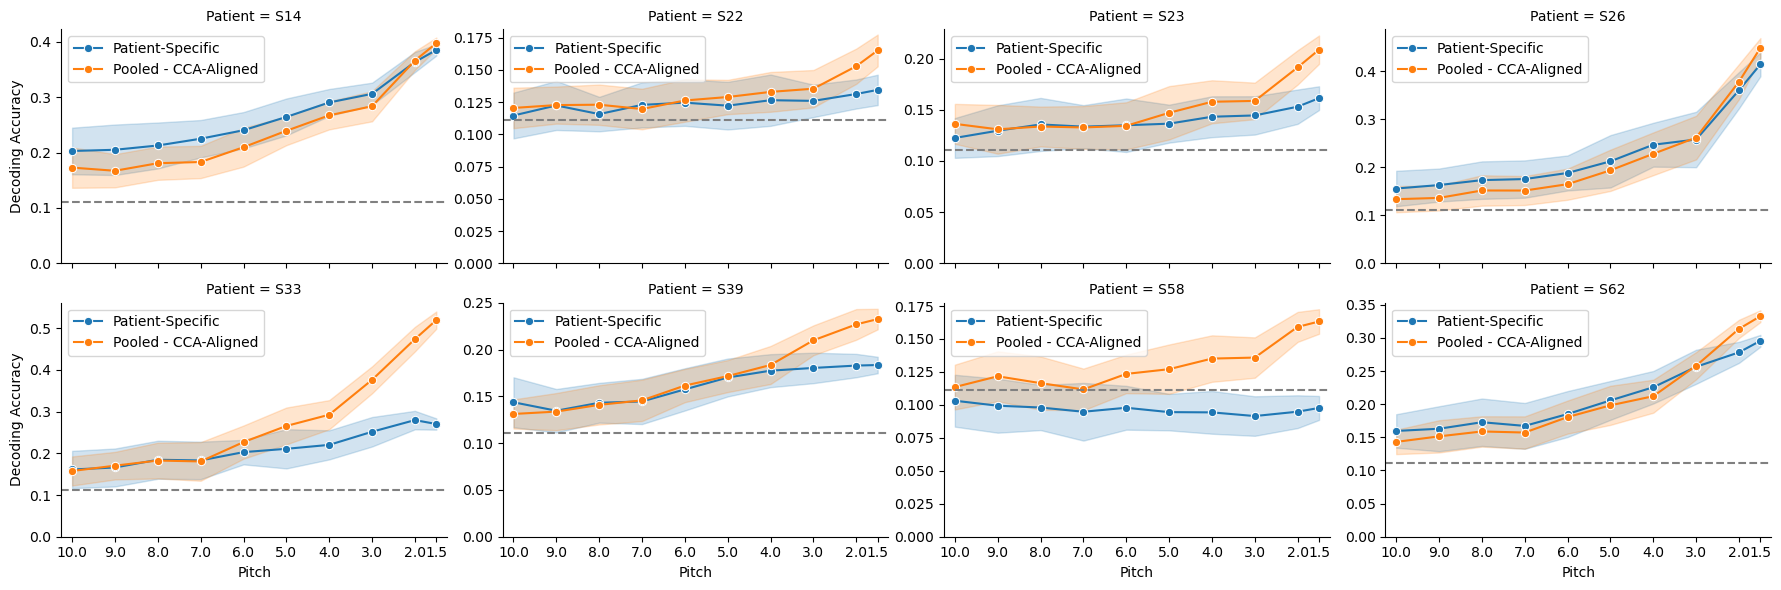

In [80]:
g = sns.FacetGrid(decode_df_long, col='Patient', col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Pitch', 'Decoding Accuracy', 'Decoding Context', marker='o', errorbar='sd', sort=False)
    
# sns.lineplot(data=decode_df_long, x='Pitch', y='Decoding Accuracy', hue='Decoding Context', marker='o')

# for g_ax in g.axes:
#     g_ax.axhline(1/9, color='grey', linestyle='--')
#     g_ax.set_ylim(0, None)
#     g_ax.set_xticks(pitch_list)
#     g_ax.invert_xaxis()
#     g_ax.legend()

for g_ax in g.axes:
    g_ax.axhline(1/9, color='grey', linestyle='--')
    g_ax.set_ylim(0, None)
    g_ax.set_xticks(pitch_list)
    g_ax.set_xlim(max(pitch_list)+0.25, min(pitch_list)-0.25)  # Explicitly reverse the x-axis
    g_ax.legend()

# plt.legend()
sns.despine()
plt.show()

In [81]:
mean_pt_df = decode_df_long.groupby(['Patient', 'Decoding Context', 'Pitch', 'Phoneme Index']).mean().reset_index()
mean_pt_diff_df = mean_pt_df.pivot(index=['Patient', 'Pitch', 'Phoneme Index'], columns='Decoding Context', values='Decoding Accuracy').reset_index()
mean_pt_diff_df['CCA - Patient-Specific'] = mean_pt_diff_df['Pooled - CCA-Aligned'] - mean_pt_diff_df['Patient-Specific']
mean_pt_diff_df = mean_pt_diff_df.drop(columns=['Patient-Specific', 'Pooled - CCA-Aligned'], axis=1)
mean_pt_diff_df

Decoding Context Patient  Pitch Phoneme Index  CCA - Patient-Specific
0                    S14    1.5          pAll                0.012176
1                    S14    2.0          pAll                0.002546
2                    S14    3.0          pAll               -0.022361
3                    S14    4.0          pAll               -0.023194
4                    S14    5.0          pAll               -0.025000
..                   ...    ...           ...                     ...
75                   S62    6.0          pAll               -0.004569
76                   S62    7.0          pAll               -0.010037
77                   S62    8.0          pAll               -0.013933
78                   S62    9.0          pAll               -0.011498
79                   S62   10.0          pAll               -0.016517

[80 rows x 4 columns]

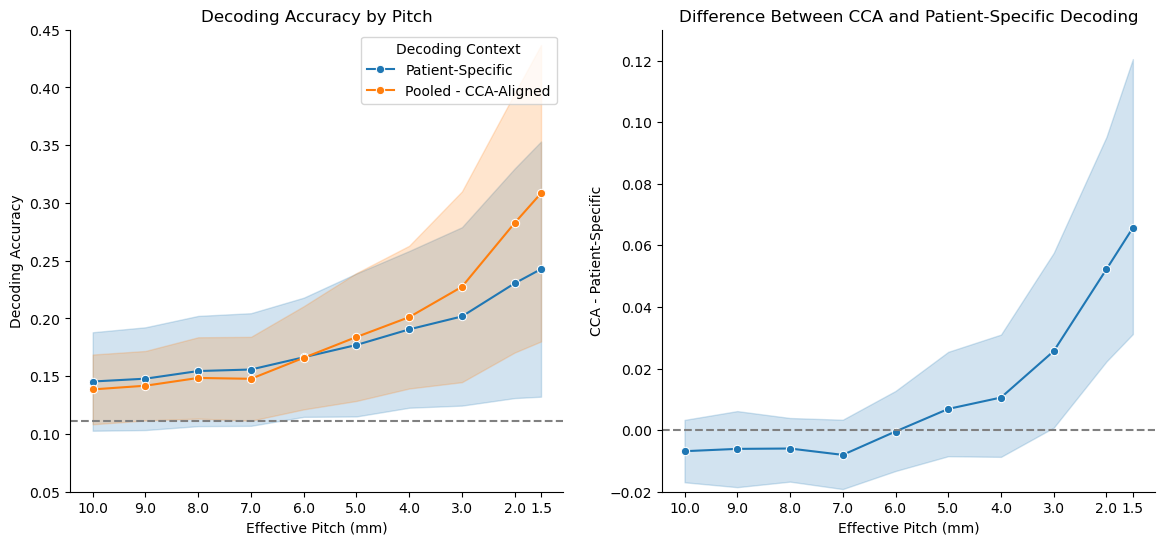

In [82]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
sns.lineplot(data=decode_df_long, x='Pitch', y='Decoding Accuracy', hue='Decoding Context', marker='o', errorbar='sd', ax=ax1)
ax1.invert_xaxis()
ax1.set_xticks(pitch_list)
ax1.set_xlabel('Effective Pitch (mm)')
ax1.axhline(1/9, color='grey', linestyle='--')
ax1.set_title('Decoding Accuracy by Pitch')
ax1.set_ylim(0.05, 0.45)
# plt.ylim(0, 0.4)
sns.lineplot(data=mean_pt_diff_df, x='Pitch', y='CCA - Patient-Specific', marker='o', ax=ax2)
ax2.invert_xaxis()
ax2.set_xticks(pitch_list)
ax2.set_xlabel('Effective Pitch (mm)')
ax2.axhline(0, color='grey', linestyle='--')
ax2.set_title('Difference Between CCA and Patient-Specific Decoding')
ax2.set_ylim(-0.02, 0.13)
sns.despine()
plt.show()

In [92]:
# run stats on difference between CCA and Patient-Specific decoding at each contact size
from scipy.stats import ttest_ind, ttest_1samp, permutation_test
from statsmodels.stats.multitest import fdrcorrection

def stat(data):
    return np.mean(data)

stat_data = []
for pitch in pitch_list:
    # pt_spf = decode_df_long[(decode_df_long['Decoding Context'] == 'Patient-Specific') & (decode_df_long['Pitch'] == pitch)]['Decoding Accuracy']
    # cca = decode_df_long[(decode_df_long['Decoding Context'] == 'Pooled - CCA-Aligned') & (decode_df_long['Pitch'] == pitch)]['Decoding Accuracy']
    # t_stat, p_val = ttest_ind(pt_spf, cca)

    diff = mean_pt_diff_df[mean_pt_diff_df['Pitch'] == pitch]['CCA - Patient-Specific']
    # t_stat, p_val = ttest_1samp(diff, 0)

    # stat_data.append((pitch, t_stat, p_val))
    
    res = permutation_test((diff,), stat, n_resamples=np.inf, alternative='two-sided', permutation_type='samples')
    stat_data.append((pitch, res.statistic, res.pvalue))

fdr_pass, fdr_pvals = fdrcorrection([p_val for _, _, p_val in stat_data])
print(fdr_pass)
for i in range(len(stat_data)):
    print(f'Pitch: {stat_data[i][0]} - t-statistic: {stat_data[i][1]}, p-value: {stat_data[i][2]}, FDR-corrected p-value: {fdr_pvals[i]}')

[False False False False False False False False  True  True]
Pitch: 10 - t-statistic: -0.006845072735404037, p-value: 0.265625, FDR-corrected p-value: 0.537109375
Pitch: 9 - t-statistic: -0.006088327323916712, p-value: 0.3984375, FDR-corrected p-value: 0.537109375
Pitch: 8 - t-statistic: -0.005973775033555773, p-value: 0.359375, FDR-corrected p-value: 0.537109375
Pitch: 7 - t-statistic: -0.008036112349819756, p-value: 0.2734375, FDR-corrected p-value: 0.537109375
Pitch: 6 - t-statistic: -0.0004476749618374295, p-value: 0.90625, FDR-corrected p-value: 0.90625
Pitch: 5 - t-statistic: 0.006883171987296675, p-value: 0.4921875, FDR-corrected p-value: 0.546875
Pitch: 4 - t-statistic: 0.01058450415327495, p-value: 0.4296875, FDR-corrected p-value: 0.537109375
Pitch: 3 - t-statistic: 0.025651749638783385, p-value: 0.1015625, FDR-corrected p-value: 0.3385416666666667
Pitch: 2 - t-statistic: 0.052248411820123616, p-value: 0.0078125, FDR-corrected p-value: 0.0390625
Pitch: 1.5 - t-statistic: 0.0

## Grid Subsampling

In [94]:
# pt_list = ['S14', 'S26', 'S33', 'S58', 'S62']
# pt_list = ['S14', 'S33']
pt_list = ['S14', 'S22', 'S23', 'S26', 'S33', 'S39', 'S58', 'S62']

# pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
pInd_list = [-1]
# pInd_list = [1]

grid_list = ['2-4', '3-6', '4-8', '5-10', '6-12', '7-14', '8-16']

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'
        for grid in grid_list:
            g_dims = grid.split('-')
            g_dims_int = [int(g) for g in g_dims]

            # since different grid subsamplings will have different numbers of iterations, create nan array to hold acc values
            # and then nans will be dropped in the dataframe later
            p_tar = np.empty((2, 300))
            p_tar[:] = np.nan

            pt_spf_accs = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/grid_subsampling/{pt}_{p_str}_gridSubsamp{grid}_ptSpecific_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            p_tar[0,:len(pt_spf_accs)] = pt_spf_accs

            cca_accs = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/grid_subsampling/cca/{pt}_{p_str}_gridSubsamp{grid}_pooled_ccaAligned_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            p_tar[1,:len(cca_accs)] = cca_accs
            
            decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - CCA-Aligned'])

            wide_dfs.append(decode_df)
            decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='Decoding Accuracy')
            decode_df['Patient'] = pt
            decode_df['Phoneme Index'] = p_str
            decode_df['Grid Size'] = grid.replace('-', 'x')
            decode_df['Grid X'] = g_dims_int[0]
            decode_df['Grid Y'] = g_dims_int[1]
            cols = decode_df.columns.tolist()
            cols = cols[-4:] + cols[:-4]
            decode_df = decode_df[cols]
            long_dfs.append(decode_df)

decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

# drop nan values used for size consistency above
decode_df_long = decode_df_long.dropna()

decode_df_long = decode_df_long.sort_values(by=['Grid X', 'Decoding Context'])
# decode_df_long['Pitch'] = decode_df_long['Pitch'].astype('category')

In [95]:
decode_df_long

Phoneme Index Grid Size  Grid X  Grid Y      Decoding Context  \
0            pAll       2x4       2       4      Patient-Specific   
1            pAll       2x4       2       4      Patient-Specific   
2            pAll       2x4       2       4      Patient-Specific   
3            pAll       2x4       2       4      Patient-Specific   
4            pAll       2x4       2       4      Patient-Specific   
..            ...       ...     ...     ...                   ...   
330          pAll      8x16       8      16  Pooled - CCA-Aligned   
331          pAll      8x16       8      16  Pooled - CCA-Aligned   
332          pAll      8x16       8      16  Pooled - CCA-Aligned   
333          pAll      8x16       8      16  Pooled - CCA-Aligned   
334          pAll      8x16       8      16  Pooled - CCA-Aligned   

     Decoding Accuracy Patient  
0             0.134259     S14  
1             0.145833     S14  
2             0.129630     S14  
3             0.143519     S14  
4             0.145833     S14  
..                 ...     ...  
330           0.297753     S62  
331           0.331461     S62  
332           0.342697     S62  
333           0.348315     S62  
334           0.331461     S62  

[7996 rows x 7 columns]

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


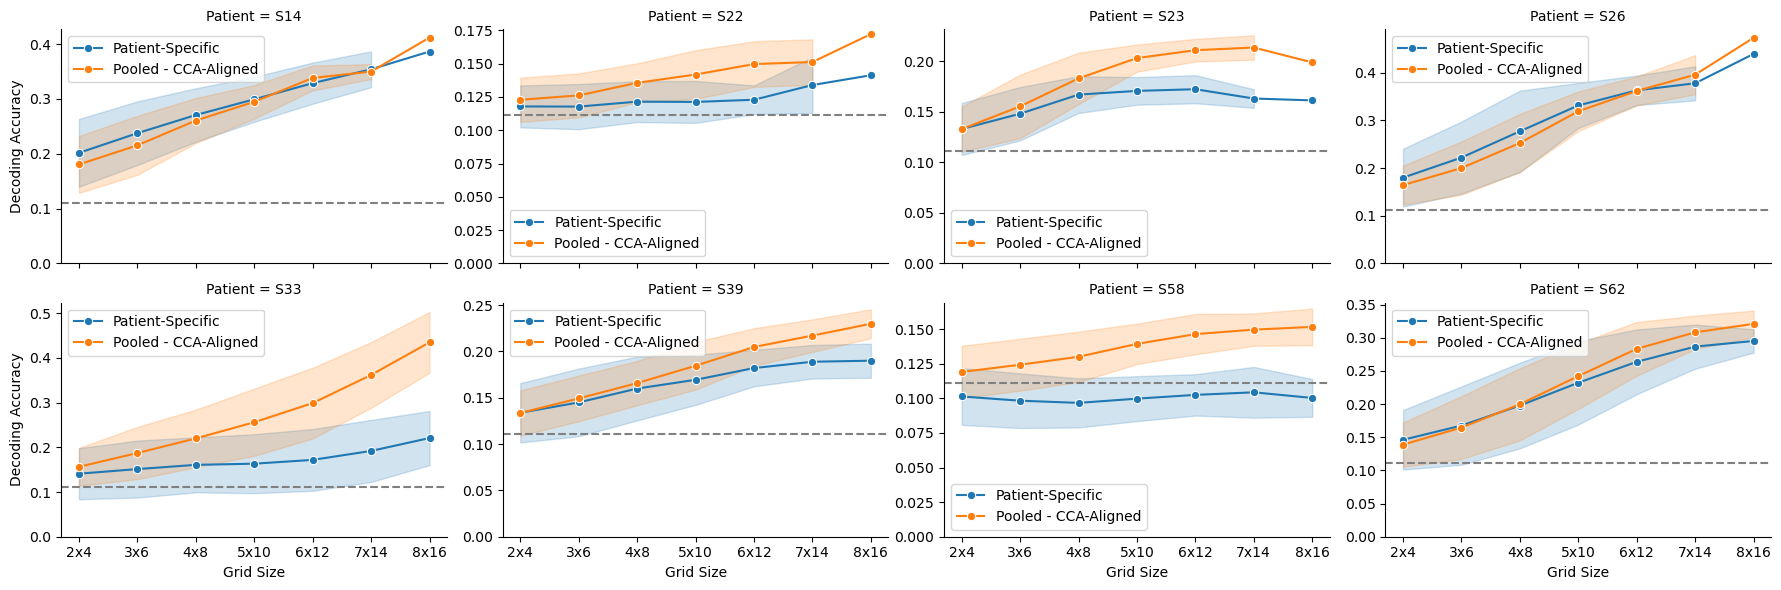

In [96]:
# fig_df = decode_df_long[decode_df_long['Phoneme Index'] != 'pAll']
g = sns.FacetGrid(decode_df_long, col='Patient', col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Grid Size', 'Decoding Accuracy', 'Decoding Context', marker='o', errorbar='sd')
    
# sns.lineplot(data=decode_df_long, x='Pitch', y='Decoding Accuracy', hue='Decoding Context', marker='o')

for g_ax in g.axes:
    g_ax.axhline(1/9, color='grey', linestyle='--')
    g_ax.set_ylim(0, None)
    g_ax.invert_xaxis()
    g_ax.legend()

# plt.legend()
sns.despine()
plt.show()

In [97]:
mean_pt_df = decode_df_long.groupby(['Patient', 'Decoding Context', 'Grid Size', 'Grid X', 'Grid Y', 'Phoneme Index']).mean().reset_index()
mean_pt_diff_df = mean_pt_df.pivot(index=['Patient', 'Grid Size', 'Grid X', 'Grid Y', 'Phoneme Index'], columns='Decoding Context', values='Decoding Accuracy').reset_index()
mean_pt_diff_df['CCA - Patient-Specific'] = mean_pt_diff_df['Pooled - CCA-Aligned'] - mean_pt_diff_df['Patient-Specific']
mean_pt_diff_df = mean_pt_diff_df.drop(columns=['Patient-Specific', 'Pooled - CCA-Aligned'], axis=1)
mean_pt_diff_df

Decoding Context Patient Grid Size  Grid X  Grid Y Phoneme Index  \
0                    S14       2x4       2       4          pAll   
1                    S14       3x6       3       6          pAll   
2                    S14       4x8       4       8          pAll   
3                    S14      5x10       5      10          pAll   
4                    S14      6x12       6      12          pAll   
5                    S14      7x14       7      14          pAll   
6                    S14      8x16       8      16          pAll   
7                    S22       2x4       2       4          pAll   
8                    S22       3x6       3       6          pAll   
9                    S22       4x8       4       8          pAll   
10                   S22      5x10       5      10          pAll   
11                   S22      6x12       6      12          pAll   
12                   S22      7x14       7      14          pAll   
13                   S22      8x16       8      16          pAll   
14                   S23       2x4       2       4          pAll   
15                   S23       3x6       3       6          pAll   
16                   S23       4x8       4       8          pAll   
17                   S23      5x10       5      10          pAll   
18                   S23      6x12       6      12          pAll   
19                   S23      7x14       7      14          pAll   
20                   S23      8x16       8      16          pAll   
21                   S26       2x4       2       4          pAll   
22                   S26       3x6       3       6          pAll   
23                   S26       4x8       4       8          pAll   
24                   S26      5x10       5      10          pAll   
25                   S26      6x12       6      12          pAll   
26                   S26      7x14       7      14          pAll   
27                   S26      8x16       8      16          pAll   
28                   S33       2x4       2       4          pAll   
29                   S33       3x6       3       6          pAll   
30                   S33       4x8       4       8          pAll   
31                   S33      5x10       5      10          pAll   
32                   S33      6x12       6      12          pAll   
33                   S33      7x14       7      14          pAll   
34                   S33      8x16       8      16          pAll   
35                   S39       2x4       2       4          pAll   
36                   S39       3x6       3       6          pAll   
37                   S39       4x8       4       8          pAll   
38                   S39      5x10       5      10          pAll   
39                   S39      6x12       6      12          pAll   
40                   S39      7x14       7      14          pAll   
41                   S39      8x16       8      16          pAll   
42                   S58       2x4       2       4          pAll   
43                   S58       3x6       3       6          pAll   
44                   S58       4x8       4       8          pAll   
45                   S58      5x10       5      10          pAll   
46                   S58      6x12       6      12          pAll   
47                   S58      7x14       7      14          pAll   
48                   S58      8x16       8      16          pAll   
49                   S62       2x4       2       4          pAll   
50                   S62       3x6       3       6          pAll   
51                   S62       4x8       4       8          pAll   
52                   S62      5x10       5      10          pAll   
53                   S62      6x12       6      12          pAll   
54                   S62      7x14       7      14          pAll   
55                   S62      8x16       8      16          pAll   

Decoding Context  CCA - Patient-Specific  
0                              -0.021164  
1                              -0.022

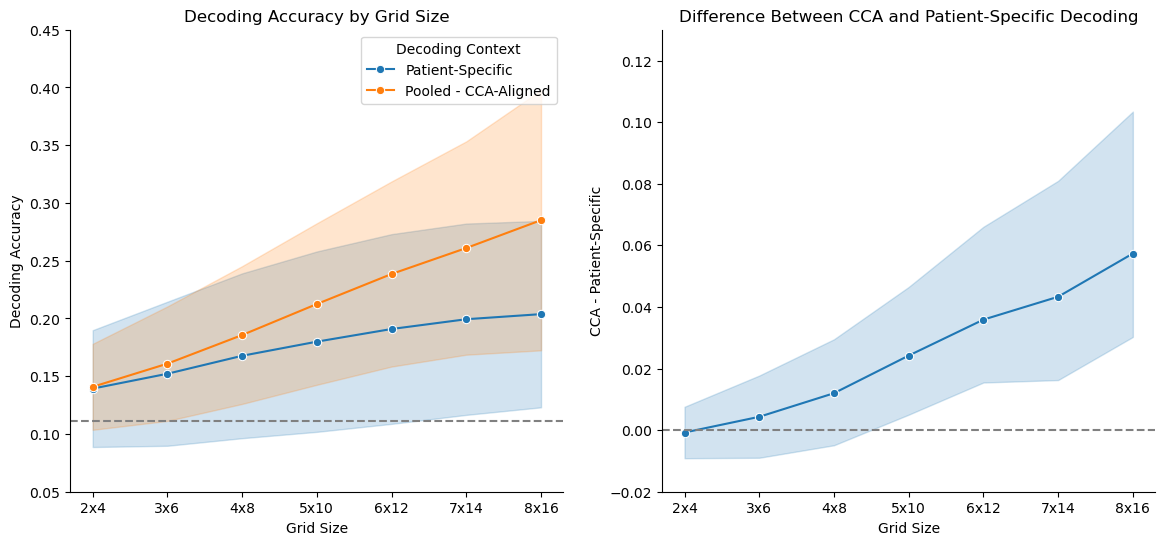

In [37]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.lineplot(data=decode_df_long, x='Grid Size', y='Decoding Accuracy', hue='Decoding Context', marker='o', errorbar='sd', ax=ax1)
ax1.axhline(1/9, color='grey', linestyle='--')
ax1.set_title('Decoding Accuracy by Grid Size')
ax1.set_ylim(0.05, 0.45)

sns.lineplot(data=mean_pt_diff_df, x='Grid Size', y='CCA - Patient-Specific', marker='o', ax=ax2)
ax2.axhline(0, color='grey', linestyle='--')
ax2.set_title('Difference Between CCA and Patient-Specific Decoding')
ax2.set_ylim(-0.02, 0.13)
sns.despine()
plt.show()

In [98]:
# run stats on difference between CCA and Patient-Specific decoding at each contact size
from scipy.stats import ttest_ind, ttest_1samp, permutation_test
from statsmodels.stats.multitest import fdrcorrection

def stat(data):
    return np.mean(data)

stat_data = []
for win_size in np.unique(decode_df_long['Grid Size']):
    # pt_spf = decode_df_long[(decode_df_long['Decoding Context'] == 'Patient-Specific') & (decode_df_long['Grid Size'] == win_size)]['Decoding Accuracy']
    # cca = decode_df_long[(decode_df_long['Decoding Context'] == 'Pooled - CCA-Aligned') & (decode_df_long['Grid Size'] == win_size)]['Decoding Accuracy']
    # t_stat, p_val = ttest_ind(pt_spf, cca)

    diff = mean_pt_diff_df[mean_pt_diff_df['Grid Size'] == win_size]['CCA - Patient-Specific']
    # t_stat, p_val = ttest_1samp(diff, 0)

    # stat_data.append((pitch, t_stat, p_val))
    
    res = permutation_test((diff,), stat, n_resamples=np.inf, alternative='two-sided', permutation_type='samples')
    stat_data.append((pitch, res.statistic, res.pvalue))

fdr_pass, fdr_pvals = fdrcorrection([p_val for _, _, p_val in stat_data])
print(fdr_pass)
for i in range(len(stat_data)):
    print(f'Grid Size: {stat_data[i][0]} - t-statistic: {stat_data[i][1]}, p-value: {stat_data[i][2]}, FDR-corrected p-value: {fdr_pvals[i]}')

[False False False False  True  True  True]
Grid Size: 1.5 - t-statistic: -0.0007770621118844967, p-value: 0.8203125, FDR-corrected p-value: 0.8203125
Grid Size: 1.5 - t-statistic: 0.00432440362443553, p-value: 0.5625, FDR-corrected p-value: 0.65625
Grid Size: 1.5 - t-statistic: 0.011983866080901249, p-value: 0.25, FDR-corrected p-value: 0.35
Grid Size: 1.5 - t-statistic: 0.02419656616922435, p-value: 0.0546875, FDR-corrected p-value: 0.095703125
Grid Size: 1.5 - t-statistic: 0.03587266372917586, p-value: 0.015625, FDR-corrected p-value: 0.036458333333333336
Grid Size: 1.5 - t-statistic: 0.04330137199778117, p-value: 0.015625, FDR-corrected p-value: 0.036458333333333336
Grid Size: 1.5 - t-statistic: 0.057339306647499685, p-value: 0.0078125, FDR-corrected p-value: 0.036458333333333336


## Spatial Averaging

In [99]:
# pt_list = ['S14', 'S26', 'S33', 'S58', 'S62']
# pt_list = ['S14', 'S33']
pt_list = ['S14', 'S22', 'S23', 'S26', 'S33', 'S39', 'S58', 'S62']

# pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
pInd_list = [-1]
# pInd_list = [1]

savg_list = [8, 7, 6, 5, 4, 3, 2, 1]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'
        for cont_size in savg_list:
        
            p_tar = np.zeros((2, 50))
            p_tar[0,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/spatialAvg_subsampling/{pt}_{p_str}_spatialAvg{cont_size}_ptSpecific_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            # p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/pitch_subsampling/unaligned/{pt}_{p_str}_pitchSubsamp{pitch}mm_pooled_unaligned_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            p_tar[1,:] = cmat_wrap(*[utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/spatialAvg_subsampling/cca/{pt}_{p_str}_spatialAvg{cont_size}_pooled_ccaAligned_rbf_noCV_20fold.pkl')[k] for k in ['y_true', 'y_pred']])
            decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - CCA-Aligned'])

            wide_dfs.append(decode_df)
            decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='Decoding Accuracy')
            decode_df['Patient'] = pt
            decode_df['Phoneme Index'] = p_str
            decode_df['Contact Length'] = cont_size
            decode_df['Contact Size'] = f'{cont_size}x{cont_size}'
            cols = decode_df.columns.tolist()
            cols = cols[-2:] + cols[:-2]
            decode_df = decode_df[cols]
            long_dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)
decode_df_long = decode_df_long.sort_values(by=['Contact Length', 'Decoding Context'], ascending=[False, True])
# decode_df_long['Contact Size'] = decode_df_long['Contact Size'].astype('category')

In [100]:
decode_df_long

Contact Length Contact Size      Decoding Context  Decoding Accuracy  \
0                8          8x8      Patient-Specific           0.236111   
1                8          8x8      Patient-Specific           0.236111   
2                8          8x8      Patient-Specific           0.250000   
3                8          8x8      Patient-Specific           0.250000   
4                8          8x8      Patient-Specific           0.231481   
..             ...          ...                   ...                ...   
95               1          1x1  Pooled - CCA-Aligned           0.340824   
96               1          1x1  Pooled - CCA-Aligned           0.335206   
97               1          1x1  Pooled - CCA-Aligned           0.320225   
98               1          1x1  Pooled - CCA-Aligned           0.323970   
99               1          1x1  Pooled - CCA-Aligned           0.333333   

   Patient Phoneme Index  
0      S14          pAll  
1      S14          pAll  
2      S14          pAll  
3      S14          pAll  
4      S14          pAll  
..     ...           ...  
95     S62          pAll  
96     S62          pAll  
97     S62          pAll  
98     S62          pAll  
99     S62          pAll  

[6400 rows x 6 columns]

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


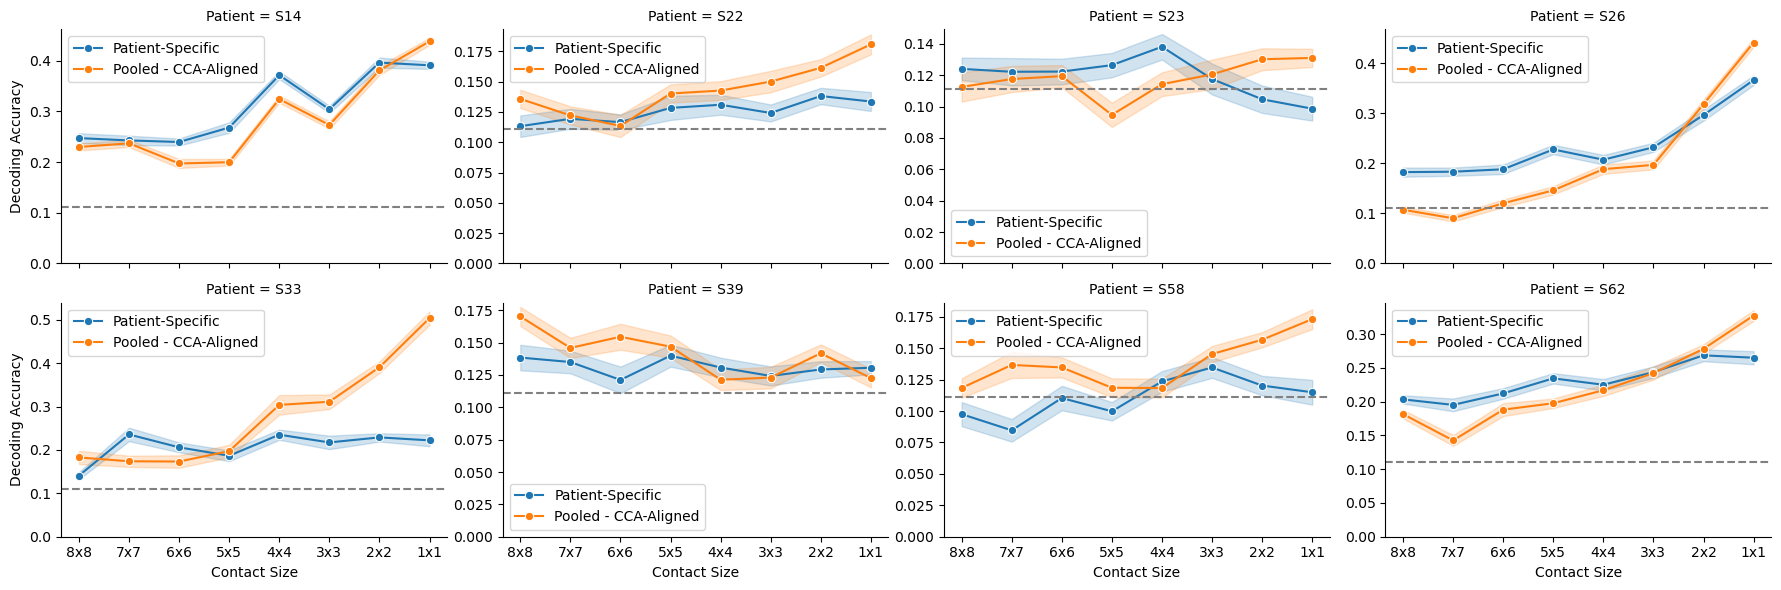

In [101]:
# fig_df = decode_df_long[decode_df_long['Phoneme Index'] != 'pAll']
g = sns.FacetGrid(decode_df_long, col='Patient', col_wrap=4, height=3, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Contact Size', 'Decoding Accuracy', 'Decoding Context', marker='o', errorbar='sd')
    
# sns.lineplot(data=decode_df_long, x='Pitch', y='Decoding Accuracy', hue='Decoding Context', marker='o')

for g_ax in g.axes:
    g_ax.axhline(1/9, color='grey', linestyle='--')
    g_ax.set_ylim(0, None)
    # g_ax.invert_xaxis()
    g_ax.legend()

# plt.legend()
sns.despine()
plt.show()

In [104]:
mean_pt_df = decode_df_long.groupby(['Patient', 'Decoding Context', 'Contact Size', 'Contact Length', 'Phoneme Index']).mean().reset_index()
mean_pt_diff_df = mean_pt_df.pivot(index=['Patient', 'Contact Size', 'Contact Length', 'Phoneme Index'], columns='Decoding Context', values='Decoding Accuracy').reset_index()
mean_pt_diff_df['CCA - Patient-Specific'] = mean_pt_diff_df['Pooled - CCA-Aligned'] - mean_pt_diff_df['Patient-Specific']
mean_pt_diff_df = mean_pt_diff_df.drop(columns=['Patient-Specific', 'Pooled - CCA-Aligned'], axis=1)
mean_pt_diff_df = mean_pt_diff_df.sort_values(by=['Contact Length'], ascending=False)
mean_pt_diff_df

Decoding Context Patient Contact Size  Contact Length Phoneme Index  \
63                   S62          8x8               8          pAll   
7                    S14          8x8               8          pAll   
47                   S39          8x8               8          pAll   
39                   S33          8x8               8          pAll   
31                   S26          8x8               8          pAll   
..                   ...          ...             ...           ...   
40                   S39          1x1               1          pAll   
24                   S26          1x1               1          pAll   
16                   S23          1x1               1          pAll   
8                    S22          1x1               1          pAll   
32                   S33          1x1               1          pAll   

Decoding Context  CCA - Patient-Specific  
63                             -0.021798  
7                              -0.017546  
47                              0.031776  
39                              0.041884  
31                             -0.075180  
..                                   ...  
40                             -0.007981  
24                              0.074955  
16                              0.032362  
8                               0.047152  
32                              0.281739  

[64 rows x 5 columns]

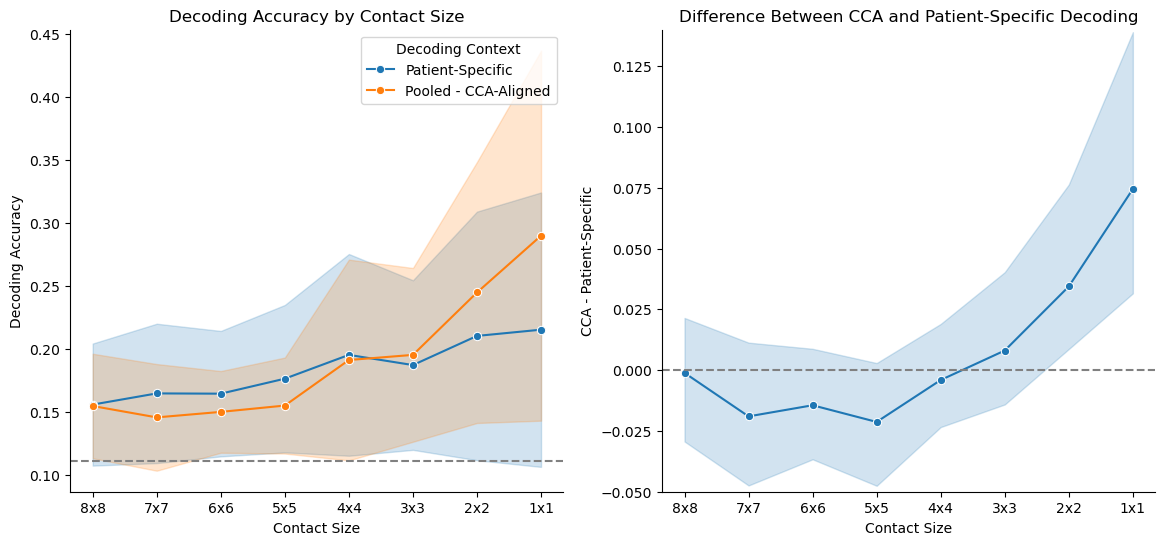

In [115]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.lineplot(data=decode_df_long, x='Contact Size', y='Decoding Accuracy', hue='Decoding Context', marker='o', errorbar='sd', ax=ax1)
ax1.axhline(1/9, color='grey', linestyle='--')
ax1.set_title('Decoding Accuracy by Contact Size')
# ax1.set_ylim(0.05, 0.45)

sns.lineplot(data=mean_pt_diff_df, x='Contact Size', y='CCA - Patient-Specific', marker='o', ax=ax2)
ax2.axhline(0, color='grey', linestyle='--')
ax2.set_title('Difference Between CCA and Patient-Specific Decoding')
ax2.set_ylim(-0.05, 0.14)
sns.despine()
plt.show()

In [116]:
# run stats on difference between CCA and Patient-Specific decoding at each contact size
from scipy.stats import ttest_ind, ttest_1samp, permutation_test
from statsmodels.stats.multitest import fdrcorrection

def stat(data):
    return np.mean(data)

stat_data = []
for cont_size in savg_list:
    # pt_spf = decode_df_long[(decode_df_long['Decoding Context'] == 'Patient-Specific') & (decode_df_long['Contact Length'] == cont_size)]['Decoding Accuracy']
    # cca = decode_df_long[(decode_df_long['Decoding Context'] == 'Pooled - CCA-Aligned') & (decode_df_long['Contact Length'] == cont_size)]['Decoding Accuracy']
    # t_stat, p_val = ttest_ind(pt_spf, cca)

    diff = mean_pt_diff_df[mean_pt_diff_df['Contact Length'] == cont_size]['CCA - Patient-Specific']
    # t_stat, p_val = ttest_1samp(diff, 0)

    # stat_data.append((pitch, t_stat, p_val))
    
    res = permutation_test((diff,), stat, n_resamples=np.inf, alternative='two-sided', permutation_type='samples')
    stat_data.append((cont_size, res.statistic, res.pvalue))

fdr_pass, fdr_pvals = fdrcorrection([p_val for _, _, p_val in stat_data])
print(fdr_pass)
for i in range(len(stat_data)):
    print(f'Contact Size: {stat_data[i][0]}x{stat_data[i][0]} - t-statistic: {stat_data[i][1]}, p-value: {stat_data[i][2]}, FDR-corrected p-value: {fdr_pvals[i]}')

[False False False False False False False False]
Contact Size: 8x8 - t-statistic: -0.0011274467854322824, p-value: 0.9453125, FDR-corrected p-value: 0.9453125
Contact Size: 7x7 - t-statistic: -0.01901483727894093, p-value: 0.28125, FDR-corrected p-value: 0.45
Contact Size: 6x6 - t-statistic: -0.014442880766143598, p-value: 0.25, FDR-corrected p-value: 0.45
Contact Size: 5x5 - t-statistic: -0.02130103629679266, p-value: 0.1796875, FDR-corrected p-value: 0.45
Contact Size: 4x4 - t-statistic: -0.004060776205662992, p-value: 0.7265625, FDR-corrected p-value: 0.8303571428571429
Contact Size: 3x3 - t-statistic: 0.008067459255176147, p-value: 0.6640625, FDR-corrected p-value: 0.8303571428571429
Contact Size: 2x2 - t-statistic: 0.03442694917595117, p-value: 0.03125, FDR-corrected p-value: 0.125
Contact Size: 1x1 - t-statistic: 0.07449928876492043, p-value: 0.015625, FDR-corrected p-value: 0.125


## Old

In [14]:
def set_box_colors(bp, colors):
    for i in range(len(colors)):
        plt.setp(bp['boxes'][i], color=colors[i])
        plt.setp(bp['caps'][2*i], color=colors[i])
        plt.setp(bp['caps'][2*i + 1], color=colors[i])
        plt.setp(bp['whiskers'][2*i], color=colors[i])
        plt.setp(bp['whiskers'][2*i+1], color=colors[i])
        # plt.setp(bp['fliers'][i], color=colors[i])
        # plt.setp(bp['fliers'][2*i+1], color=colors[i])
        plt.setp(bp['medians'][i], color=colors[i])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

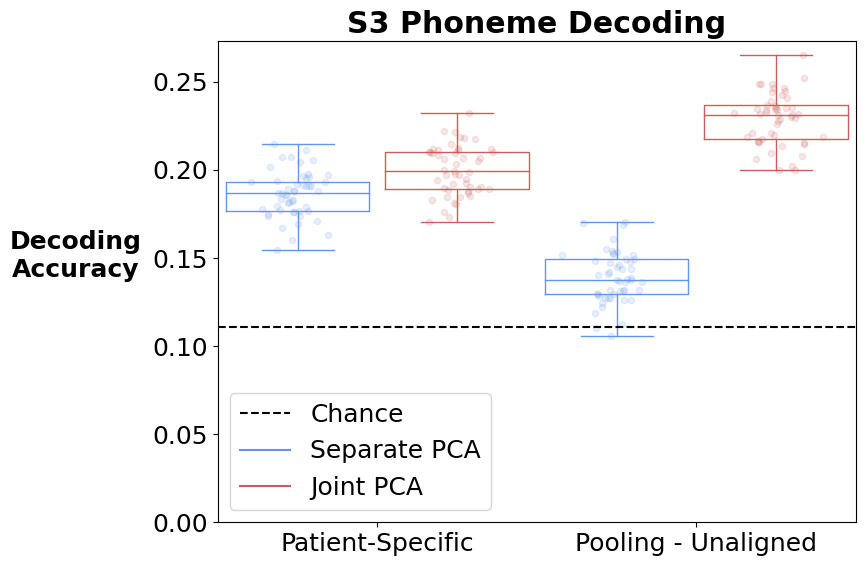

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'sans-serif',
        'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

box_width = 0.9
sc_alpha = 0.15
sc_jitter = 0.1
spacing = 2
n_tar = 4
# n_no_tar = pAll_accs.shape[1] - n_tar
# n_no_tar = 5
# tar_colors = ['cornflowerblue', 'indianred', 'mediumpurple', 'darkorange']
tar_colors = ['cornflowerblue', 'indianred', 'cornflowerblue', 'indianred']
# tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred', 'mediumpurple', 'mediumpurple']
# no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen', 'darkorange', 'cornflowerblue']
no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen']

f, ax1 = plt.subplots(1, 1, figsize=(9, 6))
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
b1 = ax1.boxplot(list(p_tar), positions=range(n_tar), widths=box_width, sym='')
set_box_colors(b1, tar_colors)
for i in range(n_tar):
    x = np.random.normal(i, sc_jitter, size=len(p_tar[i,:]))
    ax1.scatter(x, p_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax1.boxplot(list(pAll_S26_tar), positions=range(n_tar + spacing, 2*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+(n_tar+spacing), sc_jitter, size=len(pAll_S26_tar[i,:]))
#     ax1.scatter(x, pAll_S26_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b3 = ax1.boxplot(list(pAll_S23_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b3, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S23_tar[i,:]))
#     ax1.scatter(x, pAll_S23_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax1.boxplot(list(pAll_S33_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S33_tar[i,:]))
#     ax1.scatter(x, pAll_S33_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)

ax1.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax1.axhline(1/4, color='black', linestyle='--', label='Chance')
ax1.set_ylim(bottom=0)
# ax1.set_xlabel('S3')
ax1.set_ylabel('Decoding\nAccuracy', weight='bold', rotation=0, labelpad=55)
# ax1.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2, 7*(n_tar+spacing)/2-n_tar/2])
# ax1.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2])
ax1.set_xticks([0.5, 2.5])
ax1.set_xticklabels(['Patient-Specific', 'Pooling - Unaligned'])
ax1.set_title('S3 Phoneme Decoding', weight='bold')

# legend creation
a = ax1.plot([], c=tar_colors[0], label='Separate PCA')
b = ax1.plot([], c=tar_colors[1], label='Joint PCA')
# c = ax1.plot([], c=tar_colors[4], label='CCA-Aligned (Phoneme Seq)')
# d = ax1.plot([], c=tar_colors[3], label='Aligned (Articulator Seq)')
# ax1.legend(loc=[0.6, 0.04])
# ax1.legend(loc=[0.02, 0.22])
ax1.legend()

plt.tight_layout()
plt.show()

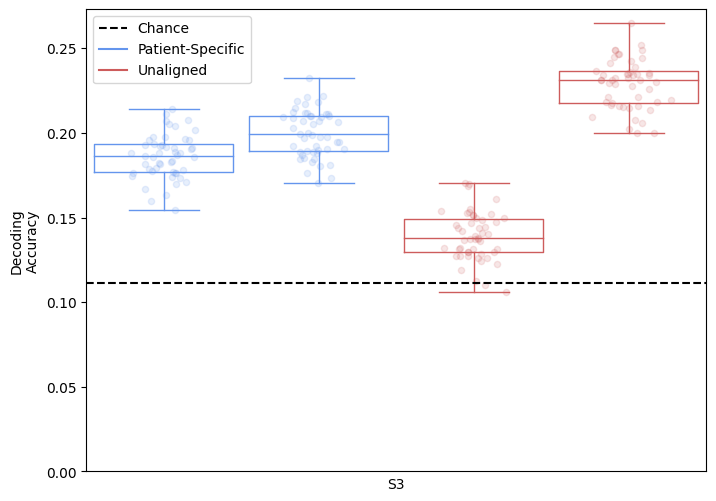

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

box_width = 0.9
sc_alpha = 0.15
sc_jitter = 0.1
spacing = 2
n_tar = 4
# n_no_tar = pAll_accs.shape[1] - n_tar
# n_no_tar = 5
# tar_colors = ['cornflowerblue', 'indianred', 'mediumpurple', 'darkorange']
tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred']
# tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred', 'mediumpurple', 'mediumpurple']
# no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen', 'darkorange', 'cornflowerblue']
no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen']

f, ax1 = plt.subplots(1, 1, figsize=(8, 6))
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
b1 = ax1.boxplot(list(p_tar), positions=range(n_tar), widths=box_width, sym='')
set_box_colors(b1, tar_colors)
for i in range(n_tar):
    x = np.random.normal(i, sc_jitter, size=len(p_tar[i,:]))
    ax1.scatter(x, p_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax1.boxplot(list(pAll_S26_tar), positions=range(n_tar + spacing, 2*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+(n_tar+spacing), sc_jitter, size=len(pAll_S26_tar[i,:]))
#     ax1.scatter(x, pAll_S26_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b3 = ax1.boxplot(list(pAll_S23_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b3, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S23_tar[i,:]))
#     ax1.scatter(x, pAll_S23_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax1.boxplot(list(pAll_S33_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S33_tar[i,:]))
#     ax1.scatter(x, pAll_S33_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)

ax1.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax1.axhline(1/4, color='black', linestyle='--', label='Chance')
ax1.set_ylim(bottom=0)
ax1.set_xlabel('S3')
ax1.set_ylabel('Decoding\nAccuracy')
# ax1.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2, 7*(n_tar+spacing)/2-n_tar/2])
# ax1.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2])
ax1.set_xticks([])
# ax1.set_xticklabels(['S14', 'S26', 'S33'])
# ax1.set_title('S33 All Positions - Target data INCLUDED in training set')

# legend creation
a = ax1.plot([], c=tar_colors[0], label='Patient-Specific')
b = ax1.plot([], c=tar_colors[2], label='Unaligned')
# c = ax1.plot([], c=tar_colors[4], label='CCA-Aligned (Phoneme Seq)')
# d = ax1.plot([], c=tar_colors[3], label='Aligned (Articulator Seq)')
# ax1.legend(loc=[0.6, 0.04])
# ax1.legend(loc=[0.02, 0.22])
ax1.legend()


# b1 = ax2.boxplot(list(pAll_S14_no_tar), positions=range(n_no_tar), widths=box_width, sym='')
# set_box_colors(b1, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i, sc_jitter, size=len(pAll_S14_no_tar[i,:]))
#     ax2.scatter(x, pAll_S14_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax2.boxplot(list(pAll_S26_no_tar), positions=range(n_no_tar + spacing, 2*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+(n_no_tar+spacing), sc_jitter, size=len(pAll_S26_no_tar[i,:]))
#     ax2.scatter(x, pAll_S26_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# # b3 = ax2.boxplot(list(pAll_S23_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# # set_box_colors(b3, no_tar_colors)
# # for i in range(n_no_tar):
# #     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S23_no_tar[i,:]))
# #     ax2.scatter(x, pAll_S23_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax2.boxplot(list(pAll_S33_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S33_no_tar[i,:]))
#     ax2.scatter(x, pAll_S33_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)

# # ax2.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax2.axhline(1/4, color='black', linestyle='--', label='Chance')
# ax2.set_ylim(bottom=0)
# ax2.set_xlabel('Target Patient')
# # ax2.set_ylabel('Decoding\nAccuracy')
# # ax2.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# # ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2, 7*(n_no_tar+spacing)/2-n_no_tar/2])
# # ax2.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2])
# ax2.set_xticklabels(['S14', 'S26', 'S33'])
# ax2.set_title('Target data EXCLUDED from training set')

# # legend creation
# a = ax2.plot([], c=no_tar_colors[0], label='Unaligned')
# b = ax2.plot([], c=no_tar_colors[1], label='Aligned (Phoneme Seq)')
# c = ax2.plot([], c=no_tar_colors[2], label='PS-Aligned to Random')
# # d = ax2.plot([], c=no_tar_colors[3], label='Aligned (Articulator Seq)')
# # e = ax2.plot([], c=no_tar_colors[4], label='AS Aligned to Random')
# # ax2.legend(loc=[0.46, 0.7])
# # ax2.legend(loc=[0.5, 0.78])
# ax2.legend()

# # plt.suptitle('All positions Phoneme Decoding with Cross-Patient CCA Alignment (no S23)')
# plt.suptitle('Position 3 Articulator Decoding with Cross-Patient CCA Alignment')
# plt.subplots_adjust(wspace=0.05)
plt.show()

## Trial Subsampling Test

In [7]:
# pt = 'S14'
# p_ind = -1
# p_str = 'All' if p_ind == -1 else str(p_ind)
context_to_colNames = {'ptSpecific': 'Patient-Specific', 'pooled_unaligned': 'Pooling - Unaligned', 'pooled_ccaAligned': 'Pooling - CCA Aligned', 'pooled_jointPCA': 'Pooling - Joint PCA'}

# p_tss = np.empty((3, 5, 50)) # pooling context, ss ratios, n_iter
# for i, context in enumerate(['ptSpecific', 'pooled_unaligned', 'pooled_ccaAligned']):
#     p_tss[i,0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp20_{context}_noCV.pkl')['accs']
#     p_tss[i,1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp40_{context}_noCV.pkl')['accs']
#     p_tss[i,2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp60_{context}_noCV.pkl')['accs']
#     p_tss[i,3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp80_{context}_noCV.pkl')['accs']
#     p_tss[i,3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_{context}_noCV.pkl')['accs']

dfs = []
for pt in ['S14', 'S26', 'S23']:
    for p in [1, 2, 3, -1]:
    # for p in [-1]:
        p_str = 'All' if p == -1 else str(p)
        for context in ['ptSpecific', 'pooled_unaligned', 'pooled_ccaAligned', 'pooled_jointPCA']:
            p_tss = np.zeros((5, 50))
            load_str = f'{pt}/p{p_str}/{pt}_p{p_str}_trSubsamp%s_{context}_rbf'

            # if context == 'pooled_jointPCA':
            #     load_str = f'{pt}/trSubsamp/p{p_str}/{pt}_p{p_str}_ncv_trSubsamp%s_{context}_rbf'
            # else:
            #     load_str = f'{pt}/{pt}_p{p_str}_ncv_trSubsamp%s_{context}_noCV'
            # suffix = '_rbf_pAlgn.pkl' if context == 'pooled_ccaAligned' else '_rbf.pkl'

            # suffix = '.pkl' if (context == 'ptSpecific' or pt == 'S23') else '_wS23.pkl'
            suffix = '.pkl'

            p_tss[0,:] = utils.load_pkl(DATA_PATH + (load_str % 20) + suffix)['accs']
            p_tss[1,:] = utils.load_pkl(DATA_PATH + (load_str % 40) + suffix)['accs']
            p_tss[2,:] = utils.load_pkl(DATA_PATH + (load_str % 60) + suffix)['accs']
            p_tss[3,:] = utils.load_pkl(DATA_PATH + (load_str % 80) + suffix)['accs']
            p_tss[4,:] = utils.load_pkl(DATA_PATH + (load_str % 100) + suffix)['accs']

            tss_df = pd.DataFrame(p_tss.T, columns=['20%', '40%', '60%', '80%', '100%'])
            tss_df = pd.melt(tss_df, var_name='Trial Subsampling Ratio', value_name='Decoding Accuracy')
            tss_df['Patient'] = pt
            tss_df['Decoding Context'] = context_to_colNames[context]
            tss_df['Phoneme'] = p_str
            cols = tss_df.columns.tolist()
            cols = cols[-3:] + cols[:-3]
            tss_df = tss_df[cols]
            dfs.append(tss_df)
tss_df = pd.concat(dfs)

In [8]:
tss_df

Patient     Decoding Context Phoneme Trial Subsampling Ratio  \
0       S14     Patient-Specific       1                     20%   
1       S14     Patient-Specific       1                     20%   
2       S14     Patient-Specific       1                     20%   
3       S14     Patient-Specific       1                     20%   
4       S14     Patient-Specific       1                     20%   
..      ...                  ...     ...                     ...   
245     S23  Pooling - Joint PCA     All                    100%   
246     S23  Pooling - Joint PCA     All                    100%   
247     S23  Pooling - Joint PCA     All                    100%   
248     S23  Pooling - Joint PCA     All                    100%   
249     S23  Pooling - Joint PCA     All                    100%   

     Decoding Accuracy  
0             0.245114  
1             0.267600  
2             0.244343  
3             0.272191  
4             0.239793  
..                 ...  
245           0.261540  
246           0.203662  
247           0.225903  
248           0.213821  
249           0.223079  

[12000 rows x 5 columns]

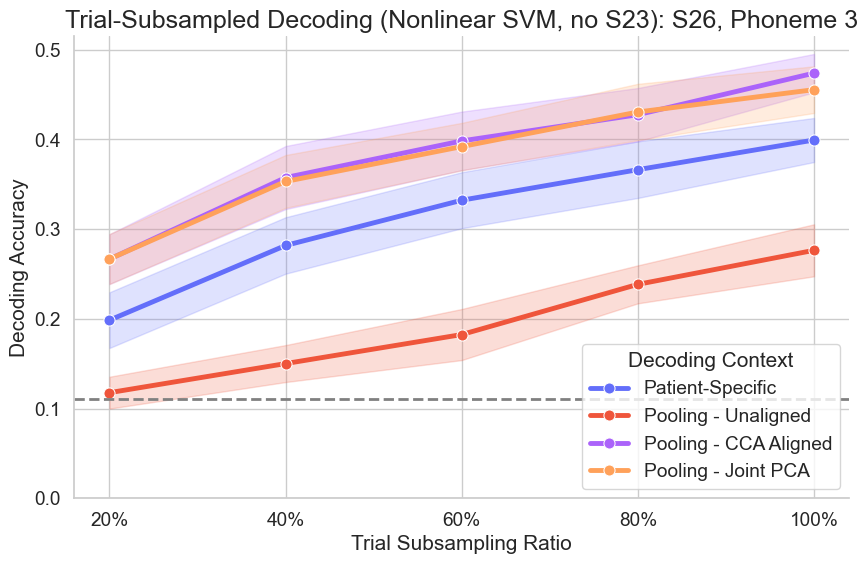

In [76]:
sns.set(style='whitegrid', font_scale=1.25)

pt_to_plot = 'S26'
p_to_plot = '3'
tss_colors = [px_default[i] for i in [0, 1, 3, 4]]

plt.figure(figsize=(10, 6))
g = sns.lineplot(
    data=tss_df[(tss_df['Phoneme']==p_to_plot) & (tss_df['Patient']==pt_to_plot)],
    x='Trial Subsampling Ratio',
    y='Decoding Accuracy',
    hue='Decoding Context',
    linewidth=3.5,
    palette=tss_colors,
    # style='.',
    marker='o',
    markersize=8,
    dashes=False,
    err_style='band',
    errorbar='sd',
)
ax = plt.gca()
ax.axhline(1/9, color='grey', linestyle='--', label='Chance', linewidth=2)
# g.set_xlim([0.1, 1.1])
g.set_ylim(bottom=0)
p_title = 'All Phonemes' if p_to_plot == 'All' else f'Phoneme {p_to_plot}'
# g.set_title(f'Trial-Subsampled Decoding (Linear SVM): S14, {p_title}', fontsize=18)
g.set_title(f'Trial-Subsampled Decoding (Nonlinear SVM, no S23): {pt_to_plot}, {p_title}', fontsize=18)

sns.despine()
plt.show()

In [9]:
tss_df

Patient     Decoding Context Phoneme Trial Subsampling Ratio  \
0       S14     Patient-Specific       1                     20%   
1       S14     Patient-Specific       1                     20%   
2       S14     Patient-Specific       1                     20%   
3       S14     Patient-Specific       1                     20%   
4       S14     Patient-Specific       1                     20%   
..      ...                  ...     ...                     ...   
245     S23  Pooling - Joint PCA     All                    100%   
246     S23  Pooling - Joint PCA     All                    100%   
247     S23  Pooling - Joint PCA     All                    100%   
248     S23  Pooling - Joint PCA     All                    100%   
249     S23  Pooling - Joint PCA     All                    100%   

     Decoding Accuracy  
0             0.245114  
1             0.267600  
2             0.244343  
3             0.272191  
4             0.239793  
..                 ...  
245           0.261540  
246           0.203662  
247           0.225903  
248           0.213821  
249           0.223079  

[12000 rows x 5 columns]

In [58]:
tss_ps_cca_S14 = tss_df[(tss_df['Phoneme']=='All') & ((tss_df['Decoding Context']=='Pooling - CCA Aligned') | (tss_df['Decoding Context']=='Patient-Specific')) & (tss_df['Patient'] == 'S14')].drop(columns=['Phoneme', 'Patient'])
tss_ps_cca_S14 = tss_ps_cca_S14.groupby(['Decoding Context', 'Trial Subsampling Ratio']).agg({'Decoding Accuracy': 'mean'})
tss_ps_cca_S14

Decoding Accuracy
Decoding Context      Trial Subsampling Ratio                   
Patient-Specific      100%                              0.363988
                      20%                               0.234489
                      40%                               0.286665
                      60%                               0.320775
                      80%                               0.345757
Pooling - CCA Aligned 100%                              0.400642
                      20%                               0.285462
                      40%                               0.327832
                      60%                               0.366492
                      80%                               0.383944

In [59]:
tss_ps_cca_S14['Trial Subsampling Ratio'] = tss_ps_cca_S14.index.get_level_values('Trial Subsampling Ratio')
tss_ps_cca_S14 = tss_ps_cca_S14.reset_index(drop=True)
tss_ps_cca_S14['diffs'] = tss_ps_cca_S14.groupby('Trial Subsampling Ratio')['Decoding Accuracy'].diff()
tss_ps_cca_S14['Trial Subsampling Ratio'] = tss_ps_cca_S14['Trial Subsampling Ratio'].apply(lambda x: int(x[:-1]))
tss_ps_cca_S14 = tss_ps_cca_S14.dropna().drop(columns=['Decoding Accuracy']).sort_values(by='Trial Subsampling Ratio')

In [60]:

tss_ps_cca_S14

Trial Subsampling Ratio     diffs
6                       20  0.050972
7                       40  0.041167
8                       60  0.045717
9                       80  0.038187
5                      100  0.036654

/tmp/ipykernel_509405/427999690.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


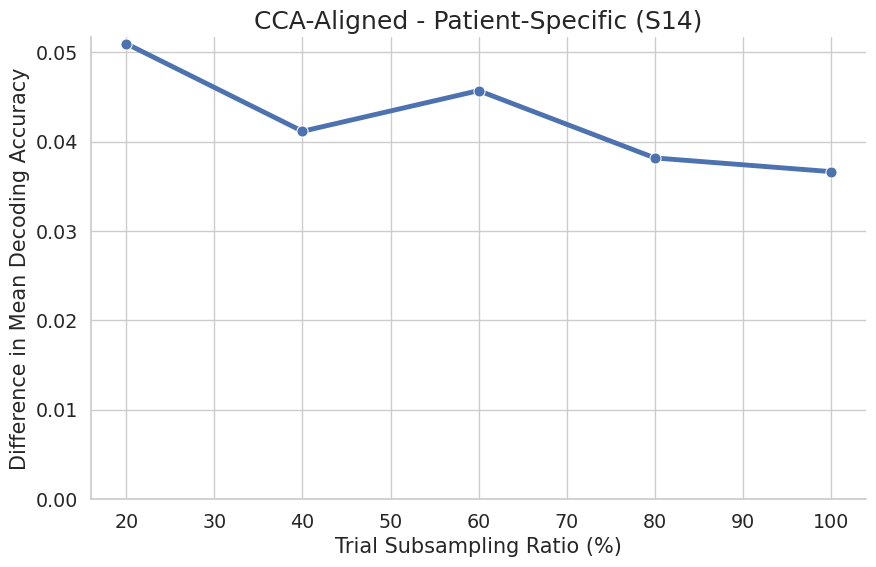

In [66]:
sns.set(style='whitegrid', font_scale=1.25)

tss_colors = [px_default[i] for i in [0, 1, 3, 4]]

plt.figure(figsize=(10, 6))
g = sns.lineplot(
    data=tss_ps_cca_S14,
    x='Trial Subsampling Ratio',
    y='diffs',
    linewidth=3.5,
    palette=tss_colors,
    # style='.',
    marker='o',
    markersize=8,
    dashes=False,
    err_style='band',
    errorbar='sd',
)
ax = plt.gca()
# g.set_xlim([0.1, 1.1])
g.set_ylim(bottom=0)
# p_title = 'All Phonemes' if p_to_plot == 'All' else f'Phoneme {p_to_plot}'
# g.set_title(f'Trial-Subsampled Decoding (Linear SVM): S14, {p_title}', fontsize=18)
ax.set_ylabel('Difference in Mean Decoding Accuracy')
ax.set_xlabel('Trial Subsampling Ratio (%)')
g.set_title(f'CCA-Aligned - Patient-Specific (S14)', fontsize=18)

sns.despine()
plt.show()

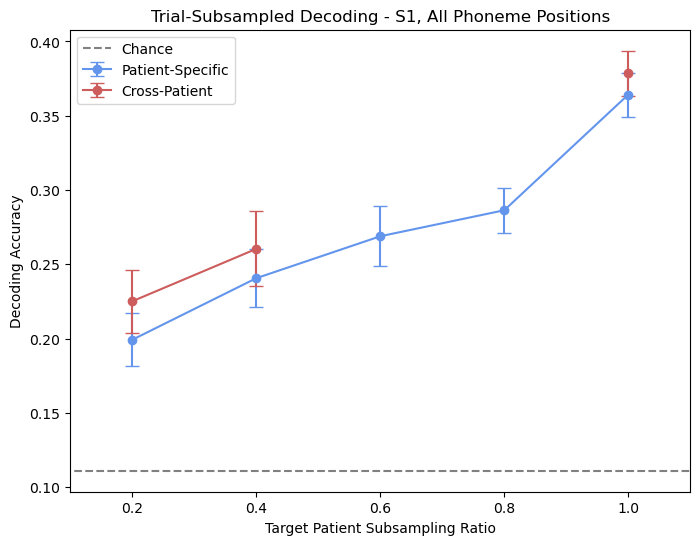

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# b1 = plt.boxplot(list(p_tss[0,:,:]), positions=[0.2, 0.4, 0.6, 0.8, 1.0], widths=0.1)
# set_box_colors(b1, ['cornflowerblue']*5)
# plt.plot([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[0,:,:], axis=1), color='cornflowerblue', label='Patient-Specific')
plt.errorbar([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[0,:,:], axis=1), yerr=np.std(p_tss[0,:,:], axis=1), color='cornflowerblue', label='Patient-Specific', capsize=5, fmt='-o')

# b2 = plt.boxplot(list(p_tss[1,:,:]), positions=[0.2, 0.4, 0.6, 0.8, 1.0], widths=0.1)
# set_box_colors(b2, ['indianred']*5)
# plt.plot([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[1,:,:], axis=1), color='indianred', label='Cross-Patient')
plt.errorbar([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[1,:,:], axis=1), yerr=np.std(p_tss[1,:,:], axis=1), color='indianred', label='Cross-Patient', capsize=5, fmt='-o')

plt.hlines(1/9, xmin=0, xmax=1.2, color='grey', linestyle='--', label='Chance')

plt.xlim(0.1, 1.1)
plt.legend()
plt.title('Trial-Subsampled Decoding - S1, All Phoneme Positions')
plt.ylabel('Decoding Accuracy')
plt.xlabel('Target Patient Subsampling Ratio')
plt.show()

## Script Accuracy Comparison

In [102]:
test_orig = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_pooled_ccaAligned_cmp.pkl')['accs']
test_noCV = utils.load_pkl(DATA_PATH + f'S14/trSubsamp/pAll/S14_pAll_ncv_trSubsamp100_pooled_ccaAligned_noCV_pAlgn.pkl')['accs']
test_noCV_up = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_ncv_pooled_ccaAligned_updatedNoCV_lin.pkl')['accs']
test_noCV_up_noDR = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_ncv_pooled_ccaAligned_updatedNoCV_lin_noDR.pkl')['accs']

In [104]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection

tt_orig_cv = ttest_ind(test_orig, test_noCV)
tt_orig_cvUp = ttest_ind(test_orig, test_noCV_up)
tt_orig_noDR = ttest_ind(test_orig, test_noCV_up_noDR)
tt_cv_cvUp = ttest_ind(test_noCV, test_noCV_up)
tt_cvUp_noDR = ttest_ind(test_noCV_up, test_noCV_up_noDR)

p_vals_uncor = [tt_orig_cv[1], tt_orig_cvUp[1], tt_orig_noDR[1], tt_cv_cvUp[1], tt_cvUp_noDR[1]]
p_vals_cor = fdrcorrection(p_vals_uncor)[1]

In [106]:
print(np.mean(test_orig) - np.mean(test_noCV_up_noDR))

0.007375492129903516


In [109]:
from scipy.stats import permutation_test
def statistic(x,y,axis):
    return np.mean(x,axis=axis) - np.mean(y,axis=axis)
res = permutation_test((test_orig, test_noCV_up_noDR), statistic)
print(res)

PermutationTestResult(statistic=0.007375492129903516, pvalue=0.0056, null_distribution=array([ 0.00378805,  0.00413342,  0.00139382, ...,  0.00025889,
        0.00319747, -0.00084865]))


In [105]:
print(p_vals_uncor)

[2.5236338187390733e-16, 4.0377126898640253e-13, 0.0060698030399875735, 0.13596477087945014, 5.282072959426172e-08]


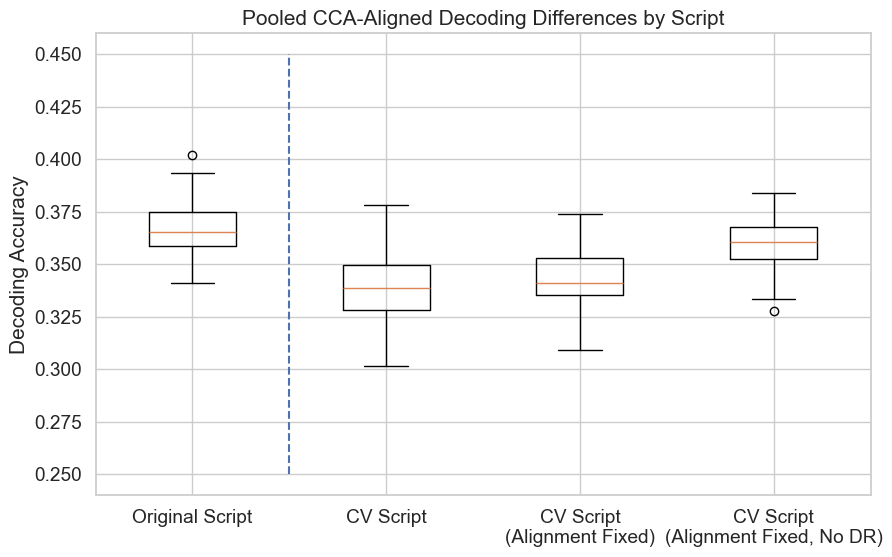

In [103]:
plt.figure(figsize=(10, 6))
plt.boxplot([test_orig, test_noCV, test_noCV_up, test_noCV_up_noDR])
plt.vlines(1.5, 0.25, 0.45, linestyles='dashed')
plt.xticks([1, 2, 3, 4], ['Original Script', 'CV Script', 'CV Script\n(Alignment Fixed)', 'CV Script\n(Alignment Fixed, No DR)'])
plt.ylabel('Decoding Accuracy')
plt.title('Pooled CCA-Aligned Decoding Differences by Script')
plt.show()

## LDA vs RBF

In [32]:
pt = 'S14'
pInd_list = [-1, 1, 2, 3]
# pInd_list = [1, 2, 3]
# pInd_list = [-1]
# pInd_list = [1]
noS23 = False
noS23_str = "_noS23" if noS23 and pt != "S23" else ""

wide_dfs = []
long_dfs = []
for p_ind in pInd_list:
    p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

    p_tar = np.zeros((6, 50))
    p_tar[0,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_lda_noCV_PCA_20fold.pkl')['accs']
    p_tar[1,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbf_noCV_PCA_20fold.pkl')['accs']
    p_tar[2,:] = utils.load_pkl(DATA_PATH + f'ptSpecific/{pt}/lda_rbf/{pt}_{p_str}_ptSpecific_rbfBag_noCV_PCA_20fold.pkl')['accs']
    p_tar[3,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_lda_noCV_PCA_20fold.pkl')['accs']
    p_tar[4,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_rbf_noCV_PCA_20fold.pkl')['accs']
    p_tar[5,:] = utils.load_pkl(DATA_PATH + f'pooled/S62_added/{pt}/lda_rbf/cca/{pt}_{p_str}_pooled_ccaAligned_rbfBag_noCV_PCA_20fold.pkl')['accs']
    
    
    
    # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooled - Unaligned', 'Pooled - CCA-Aligned', 'Pooled - MCCA-Aligned', 'Pooled - Joint PCA'])
    # decode_df = pd.DataFrame(p_tar.T, columns=['LDA', 'RBF SVM'])
    decode_df = pd.DataFrame(p_tar.T, columns=['LDA', 'SVM', 'Bagged SVM', 'LDA (pool)', 'SVM (pool)', 'Bagged SVM (pool)'])
    wide_dfs.append(decode_df)
    decode_df = pd.melt(decode_df, var_name='Model Type', value_name='accuracy')
    decode_df['Phoneme Index'] = p_str
    cols = decode_df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    decode_df = decode_df[cols]
    long_dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

In [39]:
fig = px.box(decode_df_long, color='Model Type', y="accuracy", x='Phoneme Index', points='all', width=800, height=500, color_discrete_sequence=px_colors)
# fig = px.box(decode_df_long, color='Decoding Context', y="accuracy", x='Phoneme Index', points='all', width=1300, height=650, color_discrete_sequence=px_colors)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='top',
        y=0.98,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text=f'{pt} Phoneme Decoding Accuracy (P1)',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    # tickvals=[0,1],
    range=[3-0.4, 3+0.35],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0.3, 0.7]
)
fig.show()

# Testing Out Decoder Classes

In [2]:
import utils

pt = 'S14'
p_ind = -1

tr_subsamp_r = 1

algn_type = 'phon_seq'
algn_grouping = 'class'

# decoding label type
lab_type = 'phon'
# lab_type = 'artic'

# decoding run filename
filename_suffix = 'new_joint_pca_pt-specific'
filename = f'../acc_data/joint_algn_accs/{pt}_{"p" if lab_type == "phon" else "a"}{"All" if p_ind == -1 else p_ind}_{filename_suffix}.pkl'

# load data
pt_data = utils.load_pkl('../data/pt_decoding_data.pkl')
tar_data, pre_data = utils.decoding_data_from_dict(pt_data, pt, p_ind,
                                                   lab_type=lab_type,
                                                   algn_type=algn_type)
D_tar, lab_tar, lab_tar_full = tar_data
D1, lab1, lab1_full = pre_data[0]
D2, lab2, lab2_full = pre_data[1]
D3, lab3, lab3_full = pre_data[2]

In [40]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import balanced_accuracy_score
from skopt import BayesSearchCV

from alignment_methods import CCAAlign
from cross_pt_decoders import crossPtDecoder_sepDimRed, crossPtDecoder_sepAlign


class DimRedReshape(BaseEstimator):

    def __init__(self, dim_red, n_components=10):
        self.dim_red = dim_red
        self.n_components = n_components

    def fit(self, X, y=None):
        # X_r = X.reshape(-1, X.shape[-1])
        X_r = X.reshape(X.shape[0], -1)
        self.transformer = self.dim_red(n_components=self.n_components)
        self.transformer.fit(X_r)
        return self

    def transform(self, X, y=None):
        # X_r = X.reshape(-1, X.shape[-1])
        X_r = X.reshape(X.shape[0], -1)
        X_dr = self.transformer.transform(X_r)
        # X_dr = X_dr.reshape(X.shape[0], -1)
        return X_dr

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
dim_red = PCA    

cv = StratifiedKFold(n_splits=5, shuffle=True)
# clf = make_pipeline(StandardScaler(), BaggingClassifier(
#                                                 estimator=SGDClassifier(
#                                                     penalty='elasticnet',
#                                                     early_stopping=True,
#                                                     l1_ratio=0.3,
#                                                     n_jobs=-1),
#                                                 n_estimators=10))
# clf = BaggingClassifier(estimator=SVC(kernel='linear'), n_estimators=10)
# clf = Pipeline([('normalize', StandardScaler()),
#                ('classifier', BaggingClassifier(
#                                 estimator=SVC(kernel='linear'),
#                                 n_estimators=10))])
# clf = make_pipeline(BaggingClassifier(estimator=SVC(), n_estimators=10))
# clf = make_pipeline(DimRedReshape(dim_red, n_components=0.8),
#                     BaggingClassifier(estimator=SVC(),
#                                       n_estimators=10))
clf = make_pipeline(DimRedReshape(dim_red, n_components=0.8),
                    BaggingClassifier(estimator=SVC(),
                                      n_estimators=10))

# param_grid = {'n_comp': [40, 50],
#               'decoder__baggingclassifier__estimator__alpha': [1e-5, 1e-4, 1e-3]
#               }
# param_grid = [{'decoder__estimator__kernel': ['rbf'],
#                'decoder__estimator__gamma': [1e-3, 1e-4],
#                'decoder__estimator__C': [0.1, 0.5, 1, 10, 100],
#                'n_comp': [10, 20, 30, 40, 50]}, 
#                {'decoder__estimator__kernel': ['linear'],
#                'decoder__estimator__C': [0.1, 0.5, 1, 10, 100],
#                'n_comp': [10, 20, 30, 40, 50]}]
# param_grid = {'n_comp': (10, 50),
#               'decoder__baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform')
#               }
param_grid = {
        'n_comp': (10, 50),
        'decoder__dimredreshape__n_components': (0.1, 0.95, 'uniform'),
        'decoder__baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform'),
                 }

param_grid_single = {
        'dimredreshape__n_components': (0.1, 0.95, 'uniform'),
        'baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform'),
                 }

bal_accs = []
n_iter = 1
for j in range(n_iter):
    y_true_all, y_pred_all = [], []
    for i, (train_idx, test_idx) in enumerate(cv.split(D_tar, lab_tar)):
        print(f'Fold {i+1}')
        D_tar_train, D_tar_test = D_tar[train_idx], D_tar[test_idx]
        lab_tar_train, lab_tar_test = lab_tar[train_idx], lab_tar[test_idx]
        lab_tar_full_train, lab_tar_full_test = (lab_tar_full[train_idx],
                                                lab_tar_full[test_idx])
        
        # subsample training data observations/trials
        if tr_subsamp_r < 1:
            # train test split to subsample training data with stratification
            # (could also use np.random.choice for non-stratified subsampling)
            D_tar_train, _, lab_tar_train, _, lab_tar_full_train, _ = (
                                    train_test_split(D_tar_train, lab_tar_train,
                                                        lab_tar_full_train,
                                                        train_size=tr_subsamp_r,
                                                        stratify=lab_tar_train,
                                                        shuffle=True))

        # search_cpt_dec = crossPtDecoder_sepDimRed([(D1, lab1, lab1_full),
        #                                            (D2, lab2, lab2_full),
        #                                            (D3, lab3, lab3_full)],
        #                                            clf, dim_red=PCA)
        cross_pt_data = [(D1, lab1, lab1_full),
                        (D2, lab2, lab2_full),
                        (D3, lab3, lab3_full),
                        ]
        search_cpt_dec = crossPtDecoder_sepAlign(cross_pt_data, clf, CCAAlign,
                                                 dim_red=dim_red)
        # search = RandomizedSearchCV(search_cpt_dec, param_grid, n_iter=5, cv=cv, n_jobs=-1, verbose=1)
        # search = GridSearchCV(search_cpt_dec, param_grid, cv=5, verbose=5, n_jobs=-1)
        # search = BayesSearchCV(search_cpt_dec, param_grid, n_iter=10, cv=cv,
        #                        verbose=5, n_jobs=2, n_points=5)
        # search.fit(D_tar_train, lab_tar_train, y_align=lab_tar_full_train)
        # print(f'Best Params: {search.best_params_}, Best Score: {search.best_score_}')
        # y_pred = search.predict(D_tar_test)

        # search = BayesSearchCV(clf, param_grid_single, n_iter=10, cv=cv,
        #                        verbose=5, n_jobs=2, n_points=5)
        # search.fit(D_tar_train, lab_tar_train)
        # print(f'Best Params: {search.best_params_}, Best Score: {search.best_score_}')
        # y_pred = search.predict(D_tar_test)

        # cpt_dec = crossPtDecoder_sepDimRed(cross_pt_data, clf, dim_red=dim_red,
        #                                    n_comp=40)
        cpt_dec = crossPtDecoder_sepAlign(cross_pt_data, clf, CCAAlign,
                                          dim_red=dim_red, n_comp=40)
        # cpt_dec.set_params(**search.best_params_)
        cpt_dec.fit(D_tar_train, lab_tar_train, y_align=lab_tar_full_train)
        y_pred = cpt_dec.predict(D_tar_test)

        # clf.fit(D_tar_train, lab_tar_train)
        # y_pred = clf.predict(D_tar_test)
        
        y_true_all.extend(lab_tar_test)
        y_pred_all.extend(y_pred)
    b_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    bal_accs.append(b_acc)
    print(f'Iter {j+1} Balanced Accuracy: {b_acc}\n')
print(f'Average Balanced Accuracy: {np.mean(bal_accs)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Iter 1 Balanced Accuracy: 0.38287157168831754

Average Balanced Accuracy: 0.38287157168831754
